<div style="background-color: #2020D1; padding: 40px; border-radius: 10px; color: #FFFFFF; text-align: center; box-shadow: 0 4px 8px rgba(0, 0, 0, 0.1);">
    <h1 style="font-size: 48px; font-weight: bold;"> CONCOURS CANAM AI 2023, CAMEROUN </h1>
    <h2 style="font-size: 24px; font-weight: bold; margin-top: 20px;">Precision: 0.781532 &nbsp;&nbsp; Accuracy: 0.763662</h2>
    <img src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTuanrEHCGKNN_DVs1zU4-MGKNm50rDGcXWCg&usqp=CAU" alt="GIF" style="width: 400px; margin: 20px auto;">
    <h3> PAR: VICTOR DJIEMBOU </h3>
</div>

<a id='top'></a>
<div class="list-group" id="list-tab" role="tablist"></div>

<!-- CANAM 2023 TABLE DE MATIÈRE -->
<div style="border-radius: 0px; border: 2px solid #2020ff; padding: 15px; background-color: #2020d1; font-size: 120%; text-align: center; color: #FFFFFF; font-weight: bold;">
   TABLE DE MATIÈRES
</div>


* [1. 💾 Importation de Librairies](#1.-Importation-de-Librairies)

* [2. 📑 Lecture et Explication du Jeu de Données](#2.-Lecture-et-Explication-du-Jeu-de-Données)

* [3. 📊 Analyse Exploratoire et Prétraitement des données](#3.-Analyse-Exploratoire-et-Prétraitement-des-données)

* [4. 💡 Ingenieurie des Caractéristiques](#4.-Ingenieurie-des-Caractéristiques)

* [5. 🎯 Modélisation des données](#5.-Modélisation-des-données)

* [6. 🌴 Construction des modèles d'apprentissage automatique](#6.-Construction-des-modèles-d'apprentissage-automatique)

* [7. 〽️ Reponses aux Questions du concours](#7.-Reponses-aux-Questions-du-concours)

## <div style="border-radius:0px; border:#2020ff solid; padding: 15px; background-color: #2020d1; font-size:100%; text-align:center; color: #FFFFFF">1. Importation de Librairies</div>

In [36]:
!pip install chardet


  Obtaining dependency information for chardet from https://files.pythonhosted.org/packages/38/6f/f5fbc992a329ee4e0f288c1fe0e2ad9485ed064cac731ed2fe47dcc38cbf/chardet-5.2.0-py3-none-any.whl.metadata



   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.4/199.4 kB 4.8 MB/s eta 0:00:0000:01




In [37]:
!pip install lazypredict

In [38]:
# détection d'encodage
import chardet

In [1]:
# manipulation de données
import pandas as pd
import numpy as np

# visualization
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import plotly.express as px
import plotly.figure_factory as ff
import plotly.graph_objects as go
#import shap

# modélisation de données
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler


# optimisation de paramètres 
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from hyperopt import hp, fmin, tpe

# classifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from catboost import CatBoostClassifier
import lightgbm as lgb
from lightgbm import LGBMRegressor
from bayes_opt import BayesianOptimization
from lightgbm import LGBMClassifier
#from lazypredict.Supervised import LazyClassifier
from sklearn.impute import KNNImputer
from sklearn.ensemble import VotingClassifier

# chaine de procédés 
from imblearn.pipeline import Pipeline

# métriques 
from sklearn.metrics import make_scorer, mean_absolute_error
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import precision_score,accuracy_score,f1_score, recall_score

# graphe
import networkx as nx

# fonctions utiles
import time
import collections
import math 
from datetime import datetime

# sauvegarde 
import joblib 

# html
from IPython.core.display import HTML

# styling
%matplotlib inline
sns.set_style('darkgrid')
mpl.rcParams['font.size'] = 14
mpl.rcParams['figure.facecolor'] = '#00000000'
mpl.rcParams['font.size'] = 14
mpl.rcParams['figure.facecolor'] = '#00000000'

import os

import warnings
warnings.filterwarnings("ignore")



/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3

  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


## <div style="border-radius:0px; border:#2020ff solid; padding: 15px; background-color: #2020d1; font-size:100%; text-align:center; color: #FFFFFF">2. Lecture et Explication du Jeu de Données</div>

**Ce jeu de données n'est pas encodé en utf-8, ce qui rend le chargement impossible avec l'appel de ```read_csv``` par défaut. Nous devons alors déterminer l'encodage du fichier puis l'utiliser comme hyper paramètre ```encoding``` de la méthode read_csv** 

###### encodage

In [40]:
with open("/kaggle/input/ks-dataset/data.csv", "rb") as rawdata:
    result = chardet.detect(rawdata.read())
    charenc = result['encoding']
    print(f"l'encodage du fichier de jeu de données de ce concours est : {charenc}")

l'encodage du fichier de jeu de données de ce concours est : Windows-1252


In [9]:
# chargement de données suivant l'encodage retourné par charset
data_original =  pd.read_csv("/kaggle/input/ks-dataset/data.csv",encoding=charenc)

In [2]:
prefix = 'CANAM_2023'

<div style="background-color: #2020d1; padding: 10px; border-radius: 10px; color: #FFFFFF; text-align: center; box-shadow: 0 4px 8px rgba(0, 0, 0, 0.1);">
    <h1 style="font-size: 24px;">Descriptions des caractéristiques</h1>
</div>

<div style="background-color: #FFFFFF; padding: 15px; border-radius: 10px; margin-top: 20px; text-align: left;; color: #2026d1">
    <ul>
        <li><b>ID:</b> L'identifiant unique du projet correspondant. Par exemple, "1000014025".</li>
        <li><b>name:</b> Le nom du projet correspondant. Par exemple, "Monarch Espresso Bar".</li>
        <li><b>main_category:</b> La catégorie principale dans laquelle le projet s'inscrit. Par exemple, "Poésie", "Alimentation", "Musique« , etc.</li>
        <li><b>category:</b> Une description plus précise de la catégorie principale. Sous-groupe de la catégorie principale (voir 2.). Par exemple, "Boissons" serait un
sous-groupe de la catégorie "Alimentation" de l'attribut catégorie principale.</li>
        <li><b>currency:</b> La devise du projet (par exemple, USD ou GBP).</li>
        <li><b>deadline:</b> La date limite du projet.</li>
        <li><b>goal:</b> Montant en monnaie locale demandé initialement par le projet.</li>
        <li><b>loan_percent_income:</b> The percentage of income represented by the loan amount.</li>
        <li><b>launched:</b> La date de lancement du projet.</li>
        <li><b>pledged:</b> Montant en monnaie locale que le projet a réalisé à la date limite.</li>
        <li><b>state:</b> Le projet a-t-il été couronné de succès à la fin de la journée ? L'état est une variable catégorielle divisée en niveaux : succès, échec, en cours, annulé, indéfini et suspendu.</li>
        <li><b>backers:</b> Le nombre de supporters qui ont investi dans le projet.</li>
        <li><b>country:</b> Pays d'origine du projet.</li>
        <li><b>usd pledge:</b> Montant en USD que le projet a réalisé à la date limite.</li>
    </ul>
</div>


## <div style="border-radius:0px; border:#2020ff solid; padding: 15px; background-color: #2020d1; font-size:100%; text-align:center; color: #FFFFFF">3. Analyse Exploratoire et Prétraitement des données</div>

In [10]:
class color:
    """Classe de codage de couleurs
    Constructor :
      Aucun

    Retourne :
      Aucun
    """
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'



In [12]:
# copie profonde
data = data_original.copy(deep=True)

In [8]:
# dimension du jeu de données
#dimension = data.shape
def print_dimension(dimension):
    """Afficher la dimension spaciale d'un jeu de données
    Args :
      dimension : Le Shape du jeu de données

    Retourne :
      Aucun
    """
    print(f"""
    Ce jeu de données contient exactement :
    {color.BLUE}{dimension[0]}{color.END} lignes et 
    {color.BLUE}{dimension[1]}{color.END} colonnes
    """)


In [46]:
print_dimension(data.shape)



    Ce jeu de données contient exactement :

    319466 lignes et 

    17 colonnes

    


In [47]:
# aperçu du top 5
data.head().style.set_properties(**{'background-color': '#2020d1','color': '#FFFFFF','border-color': '#FFFFFF'})

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09 11:36:00,1000,2015-08-11 12:12:28,0,failed,0,GB,0,nan,nan,nan,nan
1,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26 00:20:50,45000,2013-01-12 00:20:50,220,failed,3,US,220,nan,nan,nan,nan
2,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16 04:24:11,5000,2012-03-17 03:24:11,1,failed,1,US,1,nan,nan,nan,nan
3,1000011046,Community Film Project: The Art of Neighborhood Filmmaking,Film & Video,Film & Video,USD,2015-08-29 01:00:00,19500,2015-07-04 08:35:03,1283,canceled,14,US,1283,nan,nan,nan,nan
4,1000014025,Monarch Espresso Bar,Restaurants,Food,USD,2016-04-01 13:38:27,50000,2016-02-26 13:38:27,52375,successful,224,US,52375,nan,nan,nan,nan


**Nous observons que les quatres dernières dimensions sont des ``bruits`` qui doivent être supprimé**

In [48]:
data.columns

Index(['ID ', 'name ', 'category ', 'main_category ', 'currency ', 'deadline ',
       'goal ', 'launched ', 'pledged ', 'state ', 'backers ', 'country ',
       'usd pledged ', 'Unnamed: 13', 'Unnamed: 14', 'Unnamed: 15',
       'Unnamed: 16'],
      dtype='object')

In [ ]:
data = data[['ID ', 'name ', 'category ', 'main_category ', 'currency ', 'deadline ',
       'goal ', 'launched ', 'pledged ', 'state ', 'backers ', 'country ',
       'usd pledged ']]

###### suppression d'espaces dans les noms de colonnes

In [13]:
for col in data.columns:
    data.rename({col: col.strip()}, axis=1, inplace=True)
    
data.columns

Index(['ID', 'name', 'category', 'main_category', 'currency', 'deadline',
       'goal', 'launched', 'pledged', 'state', 'backers', 'country',
       'usd pledged', 'Unnamed: 13', 'Unnamed: 14', 'Unnamed: 15',
       'Unnamed: 16'],
      dtype='object')

In [51]:
# aperçu du top 5
data.head().style.set_properties(**{'background-color': '#2020d1','color': '#FFFFFF','border-color': '#FFFFFF'})

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09 11:36:00,1000,2015-08-11 12:12:28,0,failed,0,GB,0
1,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26 00:20:50,45000,2013-01-12 00:20:50,220,failed,3,US,220
2,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16 04:24:11,5000,2012-03-17 03:24:11,1,failed,1,US,1
3,1000011046,Community Film Project: The Art of Neighborhood Filmmaking,Film & Video,Film & Video,USD,2015-08-29 01:00:00,19500,2015-07-04 08:35:03,1283,canceled,14,US,1283
4,1000014025,Monarch Espresso Bar,Restaurants,Food,USD,2016-04-01 13:38:27,50000,2016-02-26 13:38:27,52375,successful,224,US,52375


In [52]:
# info du jeu de données
data.info()

<class 'pandas.core.frame.DataFrame'>

RangeIndex: 319466 entries, 0 to 319465

Data columns (total 13 columns):

 #   Column         Non-Null Count   Dtype 

---  ------         --------------   ----- 

 0   ID             319466 non-null  int64 

 1   name           319462 non-null  object

 2   category       319461 non-null  object

 3   main_category  319466 non-null  object

 4   currency       319465 non-null  object

 5   deadline       319465 non-null  object

 6   goal           319465 non-null  object

 7   launched       319465 non-null  object

 8   pledged        319465 non-null  object

 9   state          319465 non-null  object

 10  backers        319465 non-null  object

 11  country        319465 non-null  object

 12  usd pledged    315729 non-null  object

dtypes: int64(1), object(12)

memory usage: 31.7+ MB


**``Il existe des données numérique cachées sous le type object (pour catégorielle)``, il faut corriger ses dimension erronées.**


**Aussi, ``La colonne Non-Null nous montre que nous sommes en présence d'un jeu de données posédant des valeurs manquantes``**

In [3]:
def multi_table(table_list):
    """Afficher des tableaux isolés conténant des valeurs
    Args :
      table_list : Une liste de dictionnaire

    Retourne :
      Un noeud HTML
    """
    return HTML('<table><tr style="background-color:#2020d1; color: #FFFFFF;">' +  ''.join(['<td>' + table._repr_html_() + '</td>' for table in table_list]) +'</tr></table>')


##### ``graphique illustrant l'impact de la qualité des données``

In [54]:
nunique_df={var:pd.DataFrame(data[var].value_counts())
           for var in data.columns.tolist()}

multi_table([nunique_df[col] for col in data.columns.tolist()])

,count
ID,
1000002330,1
335628148,1
335695193,1
335695192,1
335693425,1
...,...
1632381819,1
1632371135,1
1632370988,1


**Nous remarquons qu'il existe des valeurs abérantes dans les dimensions qui de mon observation des visuels précedents resulteraient d'une mauvaise délimitation ou formatage de valeurs dans  certaines lignes du jeu de données**

### ``usd pledged``

In [14]:
# L'intuition est que nous savons qu'il s'agit d'un jeu de données tabulaire de dimension 13 donc s'il existement une erreur
# de délimitation, elle aura forcement un impact sur la 13ème colonne et progressivement vers la 0.
# Nous allons donc chercher à extraire toutes les abérations de cette colonne et nous allons stocker dans un tableau les examples 
# infectés.
valuers_incorrect= []
lignes_incoherentes= []
data['usd pledged'].apply(lambda x: valuers_incorrect.append(x) if not(str(x).replace('.','').isnumeric()) else None )
#print(valuers_incorrect)
for el in np.unique(valuers_incorrect):
    print(el)
    if el == 'nan':
        lignes_incoherentes.append(data[data.columns][data['usd pledged'].isna()])
    else:
        lignes_incoherentes.append(data[data.columns][data['usd pledged'] == el])

AU

CA

DE

ES

FR

GB

IE

IT

N,"0

NL

NZ

SE

SG

US

failed

nan

successful


**la plupart des valeurs abérantes de la 13ème dimension sont des valeur de la 12ème suivies de celles de la 11ème dimension.**

In [15]:
# lignes des aberation à valeur NaN
print(123456)
lignes_incoherentes[-2]

123456


,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16
150,1000694855,STREETFIGHTERZ WHEELIE MURICA,Film & Video,Film & Video,USD,2014-09-20 06:59:00,6500,2014-08-06 21:28:36,555,undefined,0,"N,""0",NaN,NaN,NaN,NaN,NaN
287,100149523,Duncan Woods - Chameleon EP,Music,Music,AUD,2015-08-25 23:00:00,4500,2015-08-04 12:05:17,4767,undefined,0,"N,""0",NaN,NaN,NaN,NaN,NaN
549,1003023003,The Making of Ashley Kelley's Debut Album,Music,Music,USD,2015-04-09 21:06:13,3500,2015-03-10 20:06:13,3576,undefined,0,"N,""0",NaN,NaN,NaN,NaN,NaN
561,1003130892,Butter Side Down Debut Album,Music,Music,USD,2015-11-26 10:59:00,6000,2015-11-02 22:09:19,7007.8,undefined,0,"N,""0",NaN,NaN,NaN,NaN,NaN
650,1003629045,Chase Goehring debut EP,Music,Music,USD,2016-03-21 06:00:00,3000,2016-02-23 03:09:49,3660.38,undefined,0,"N,""0",NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
318995,971243996,The Eastern Wood,Film & Video,Film & Video,USD,2016-03-26 19:58:09,3000,2016-03-06 20:58:14,3000,undefined,0,"N,""0",NaN,NaN,NaN,NaN,NaN
319180,972269368,The Wrath of Gagiedoo,Publishing,Publishing,USD,2015-06-04 07:36:18,8000,2015-05-05 07:36:18,3,undefined,0,"N,""0",NaN,NaN,NaN,NaN,NaN
319282,972902179,Drummer's Dream to Educate/Inspire,Music,Music,CAD,2015-08-24 00:19:56,6750,2015-06-25 00:19:56,0,undefined,0,"N,""0",NaN,NaN,NaN,NaN,NaN
319387,973573632,Endless - New Age Piano Album,Music,Music,EUR,2015-07-18 12:50:41,5000,2015-06-18 12:50:41,0,undefined,0,"N,""0",NaN,NaN,NaN,NaN,NaN


In [16]:
# infectés à valeur de country AU
lignes_incoherentes[0]

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16
57275,1340244840,The Interactive Canvas,Gaming Artists (Canceled),Nonfiction,Publishing,AUD,2014-02-07 03:49:43,60000,2014-01-08 03:49:43,7271,canceled,84,AU,6507.05253517,NaN,NaN,NaN
88406,1525495784,Deck Of Lies,The Game of Deception,Games,Games,AUD,2016-02-29 11:42:53,2000,2016-02-02 11:42:53,171,failed,17,AU,120.794532,NaN,NaN,NaN
92651,1550781348,Revolutionary Ecommerce Marketplace,plansforbuilding.com.au,Architecture,Design,AUD,2015-07-01 06:00:00,100000,2015-05-19 18:54:36,1,canceled,1,AU,0.801401,NaN,NaN,NaN
93676,1556435755,Masked,Follow the Rabbit.,Photobooks,Photography,AUD,2016-11-01 04:40:36,3000,2016-09-02 05:40:36,3320,successful,41,AU,86.584128,NaN,NaN,NaN
95409,1566802295,The Azure Syndicate Trilogy Novels,Book One - The Ice Queen,Fiction,Publishing,AUD,2014-01-29 14:21:59,1000,2013-12-30 14:21:59,1322,successful,30,AU,1172.451473,NaN,NaN,NaN
147793,1878007495,A Timeless Leather Satchel,Stitched By You,Product Design,Design,AUD,2015-11-02 12:25:57,20000,2015-10-03 12:25:57,7542,failed,24,AU,5303.555065,NaN,NaN,NaN
151187,1898416138,SPORTS CIDER (Coconut),A World First!,Food,Food,AUD,2016-09-19 13:00:54,5000,2016-07-21 13:00:54,10,failed,1,AU,0.0,NaN,NaN,NaN
158783,1944484342,30days Twine Water Drop,Self Watering Spike - Eky'ta,Product Design,Design,AUD,2016-06-29 01:04:15,1900,2016-05-25 01:04:15,2338,successful,52,AU,1692.450354,NaN,NaN,NaN
165093,19818446,SK!N,a glimpse into the world of Human Trafficking,Performances,Dance,AUD,2016-07-30 12:00:00,30000,2016-06-19 21:18:29,30112,successful,114,AU,4522.491184,NaN,NaN,NaN
183796,2094544302,Free2Dice – Aluminium Dice,Free to write anything!,Tabletop Games,Games,AUD,2016-10-14 09:07:34,5500,2016-09-19 09:07:34,2058,failed,40,AU,829.353264,NaN,NaN,NaN


**Nous observons que les données de la colonne ``category`` ne sont que des continuités de noms de campagnes**

In [17]:
# infectés à valeur de country CA
lignes_incoherentes[1]

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16
17890,1105567472,Project: Fruit Stars - Growing Local,Feeding Local,Food,Food,CAD,2015-09-18 07:04:14,17000,2015-08-28 07:04:14,17861,successful,167,CA,13446.90533288,NaN,NaN,NaN
22537,1133241547,Symbiofruits,Verger en Polyculture Orchard,Small Batch,Food,CAD,2015-04-30 00:34:55,2000,2015-03-31 00:34:55,2530,successful,28,CA,2006.0578219,NaN,NaN,NaN
35323,1209902643,100 Metre Sunrise,The New Wind Warriors (Canceled),Documentary,Film & Video,CAD,2015-03-02 06:59:00,15000,2015-01-29 13:49:53,400,canceled,10,CA,321.629504,NaN,NaN,NaN
67072,1398721180,Devenez membre de la Boutique Hellfire,Soyez un Champion,Games,Games,CAD,2016-10-18 04:00:00,1500,2016-10-05 18:26:41,6093,successful,89,CA,3186.062388,NaN,NaN,NaN
71963,1427746576,Grogoo.com,Connecting Communities (Canceled),Technology,Technology,CAD,2014-07-08 18:36:18,77000,2014-06-03 18:36:18,130,canceled,3,CA,119.793807,NaN,NaN,NaN
84625,1502129617,Leo & Sam,Beautiful enough for you but made for your pet,Pet Fashion,Fashion,CAD,2016-09-19 14:27:46,10000,2016-07-21 14:27:46,514,failed,13,CA,172.82898,NaN,NaN,NaN
102202,1607100620,It's All Good,Family Nutrition,Food,Food,CAD,2015-11-01 07:00:00,1000,2015-10-02 23:47:47,1,failed,1,CA,0.75115847,NaN,NaN,NaN
112210,1665939551,Urban traffic calming,kids vs. cars,Civic Design,Design,CAD,2016-05-16 00:21:00,5000,2016-04-24 19:02:33,971,failed,16,CA,766.15413078,NaN,NaN,NaN
172769,2028294525,FIXING FASHION,BEYOND RANA PLAZA,Publishing,Publishing,CAD,2014-09-19 22:31:19,8500,2014-08-15 22:31:19,721,failed,21,CA,660.417283,NaN,NaN,NaN
238476,487852882,Back to Nature,Replant-Regrow,Installations,Art,CAD,2015-09-16 19:20:26,10000,2015-07-18 19:20:26,0,failed,0,CA,0,NaN,NaN,NaN


**Nous remarquons que c'est le presence de ``,`` pour séparer les syntagmes de noms de campagnes qui entraine certaines abérations**

In [18]:
# verifions si dans le jeu de données original, les valeurs de usd pledged se trouvent dans les dimensions non nommées.
data_original.iloc[lignes_incoherentes[1].index.tolist(),[13,14,15,16]]

,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16
17890,13446.90533288,NaN,NaN,NaN
22537,2006.0578219,NaN,NaN,NaN
35323,321.629504,NaN,NaN,NaN
67072,3186.062388,NaN,NaN,NaN
71963,119.793807,NaN,NaN,NaN
84625,172.82898,NaN,NaN,NaN
102202,0.75115847,NaN,NaN,NaN
112210,766.15413078,NaN,NaN,NaN
172769,660.417283,NaN,NaN,NaN
238476,0,NaN,NaN,NaN


In [19]:
data_original.iloc[lignes_incoherentes[0].index.tolist(),[13,14,15,16]]

,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16
57275,6507.05253517,NaN,NaN,NaN
88406,120.794532,NaN,NaN,NaN
92651,0.801401,NaN,NaN,NaN
93676,86.584128,NaN,NaN,NaN
95409,1172.451473,NaN,NaN,NaN
147793,5303.555065,NaN,NaN,NaN
151187,0.0,NaN,NaN,NaN
158783,1692.450354,NaN,NaN,NaN
165093,4522.491184,NaN,NaN,NaN
183796,829.353264,NaN,NaN,NaN


In [20]:
data_original.iloc[lignes_incoherentes[2].index.tolist(),[13,14,15,16]]

,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16
96508,1526.616225,NaN,NaN,NaN


In [21]:
data_original.iloc[lignes_incoherentes[3].index.tolist(),[13,14,15,16]]

,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16
258117,13436.602656755,NaN,NaN,NaN


In [22]:
data_original.iloc[lignes_incoherentes[4].index.tolist(),[13,14,15,16]]

,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16
36188,2275.2478569,NaN,NaN,NaN
190029,0.0,NaN,NaN,NaN


In [23]:
data_original.iloc[lignes_incoherentes[5].index.tolist(),[13,14,15,16]]

,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16
3079,4986.41798748,NaN,NaN,NaN
6586,3.39594898,NaN,NaN,NaN
11236,126.9669968,NaN,NaN,NaN
18745,1847.3965377,NaN,NaN,NaN
24841,566.57479307,NaN,NaN,NaN
25328,9444.43338774,NaN,NaN,NaN
28210,357.66549924,NaN,NaN,NaN
32739,8.5104355,NaN,NaN,NaN
36671,8.26779725,NaN,NaN,NaN
40253,7.9006665,NaN,NaN,NaN


In [24]:
data_original.iloc[lignes_incoherentes[6].index.tolist(),[13,14,15,16]]

,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16
85721,272.199141,NaN,NaN,NaN


In [25]:
data_original.iloc[lignes_incoherentes[7].index.tolist(),[13,14,15,16]]

,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16
292337,0,NaN,NaN,NaN


In [26]:
data_original.iloc[lignes_incoherentes[8].index.tolist(),[13,14,15,16]]

,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16
64484,NaN,NaN,NaN,NaN
85619,NaN,NaN,NaN,NaN
98614,NaN,NaN,NaN,NaN
123506,NaN,NaN,NaN,NaN
159427,NaN,NaN,NaN,NaN
163067,NaN,NaN,NaN,NaN
177636,NaN,NaN,NaN,NaN


In [27]:
data_original.iloc[lignes_incoherentes[9].index.tolist(),[13,14,15,16]]

,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16
74902,246.798142,NaN,NaN,NaN
104247,5746.54531605,NaN,NaN,NaN
105939,3657.9864981,NaN,NaN,NaN
252207,1901.01102436,NaN,NaN,NaN
256336,25.1320575,NaN,NaN,NaN
278302,195.00255516,NaN,NaN,NaN


In [28]:
data_original.iloc[lignes_incoherentes[10].index.tolist(),[13,14,15,16]]

,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16
162906,113.507644,NaN,NaN,NaN


In [29]:
data_original.iloc[lignes_incoherentes[11].index.tolist(),[13,14,15,16]]

,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16
1454,504.94765278,NaN,NaN,NaN
134850,921.753421,NaN,NaN,NaN


In [30]:
data_original.iloc[lignes_incoherentes[12].index.tolist(),[13,14,15,16]]

,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16
32886,2920.0614495,NaN,NaN,NaN


In [31]:
data_original.iloc[lignes_incoherentes[13].index.tolist(),[13,14,15,16]]

,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16
1563,3984,NaN,NaN,NaN
1794,525,NaN,NaN,NaN
1931,0,NaN,NaN,NaN
2420,3035,NaN,NaN,NaN
4850,590,NaN,NaN,NaN
...,...,...,...,...
316094,290,NaN,NaN,NaN
316564,1577,NaN,NaN,NaN
316702,545,NaN,NaN,NaN
317015,2356,NaN,NaN,NaN


**La dimension non nommée ``Unnamed:13`` contient les informations utiles pour combler le vide qui se créera au niveau de la variable ``usd pledged`` lorsqu'elle contient des valeur de `country`**

In [32]:
valuers_incorrect = np.unique(valuers_incorrect).tolist()
for el in ['AU','CA','DE','ES','FR','GB','IE','IT','NL','NZ','SE','SG','US']:
    # replace name
    data['name'][lignes_incoherentes[valuers_incorrect.index(el)].index.tolist()] = lignes_incoherentes[valuers_incorrect.index(el)].name+ ';' + lignes_incoherentes[valuers_incorrect.index(el)].category
    # replace category
    data['category'][lignes_incoherentes[valuers_incorrect.index(el)].index.tolist()] = lignes_incoherentes[valuers_incorrect.index(el)].main_category
    # replace main_category
    data['main_category'][lignes_incoherentes[valuers_incorrect.index(el)].index.tolist()] = lignes_incoherentes[valuers_incorrect.index(el)].currency
    # replace currency
    data['currency'][lignes_incoherentes[valuers_incorrect.index(el)].index.tolist()] = lignes_incoherentes[valuers_incorrect.index(el)].deadline
    # replace deadline
    data['deadline'][lignes_incoherentes[valuers_incorrect.index(el)].index.tolist()] = lignes_incoherentes[valuers_incorrect.index(el)].goal
    # replace goal
    data['goal'][lignes_incoherentes[valuers_incorrect.index(el)].index.tolist()] = lignes_incoherentes[valuers_incorrect.index(el)].launched
    # replace launched
    data['launched'][lignes_incoherentes[valuers_incorrect.index(el)].index.tolist()] = lignes_incoherentes[valuers_incorrect.index(el)].pledged
    # replace pledged
    data['pledged'][lignes_incoherentes[valuers_incorrect.index(el)].index.tolist()] = lignes_incoherentes[valuers_incorrect.index(el)].state
    # replace state
    data['state'][lignes_incoherentes[valuers_incorrect.index(el)].index.tolist()] = lignes_incoherentes[valuers_incorrect.index(el)].backers
    # replace backers
    data['backers'][lignes_incoherentes[valuers_incorrect.index(el)].index.tolist()] = lignes_incoherentes[valuers_incorrect.index(el)].country
    # replace country
    data['country'][lignes_incoherentes[valuers_incorrect.index(el)].index.tolist()] = lignes_incoherentes[valuers_incorrect.index(el)]['usd pledged']
    # replace usd pledged
    data['usd pledged'][lignes_incoherentes[valuers_incorrect.index(el)].index.tolist()] = data_original.iloc[lignes_incoherentes[valuers_incorrect.index(el)].index.tolist(),[13]].squeeze()

    
for el in ['N,"0']:
    # replace name
    data['name'][lignes_incoherentes[valuers_incorrect.index(el)].index.tolist()] = lignes_incoherentes[valuers_incorrect.index(el)].name+ ';' + lignes_incoherentes[valuers_incorrect.index(el)].category
    # replace category
    data['category'][lignes_incoherentes[valuers_incorrect.index(el)].index.tolist()] = lignes_incoherentes[valuers_incorrect.index(el)].main_category
    # replace main_category
    data['main_category'][lignes_incoherentes[valuers_incorrect.index(el)].index.tolist()] = lignes_incoherentes[valuers_incorrect.index(el)].currency
    # replace currency
    data['currency'][lignes_incoherentes[valuers_incorrect.index(el)].index.tolist()] = lignes_incoherentes[valuers_incorrect.index(el)].deadline
    # replace deadline
    data['deadline'][lignes_incoherentes[valuers_incorrect.index(el)].index.tolist()] = lignes_incoherentes[valuers_incorrect.index(el)].goal
    # replace goal
    data['goal'][lignes_incoherentes[valuers_incorrect.index(el)].index.tolist()] = lignes_incoherentes[valuers_incorrect.index(el)].launched
    # replace launched
    data['launched'][lignes_incoherentes[valuers_incorrect.index(el)].index.tolist()] = lignes_incoherentes[valuers_incorrect.index(el)].pledged
    # replace pledged
    data['pledged'][lignes_incoherentes[valuers_incorrect.index(el)].index.tolist()] = lignes_incoherentes[valuers_incorrect.index(el)].state
    # replace state
    data['state'][lignes_incoherentes[valuers_incorrect.index(el)].index.tolist()] = lignes_incoherentes[valuers_incorrect.index(el)].backers
    # replace backers
    data['backers'][lignes_incoherentes[valuers_incorrect.index(el)].index.tolist()] = lignes_incoherentes[valuers_incorrect.index(el)].country
    # replace country
    data['country'][lignes_incoherentes[valuers_incorrect.index(el)].index.tolist()] = lignes_incoherentes[valuers_incorrect.index(el)]['usd pledged']
    # replace usd pledged
    data['usd pledged'][lignes_incoherentes[valuers_incorrect.index(el)].index.tolist()] = '0'

In [33]:
lignes_incoherentes[valuers_incorrect.index('failed')]

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16
145502,1864561559,T-shirt,dress shirts,pants,clothing company,Apparel,Fashion,USD,2015-08-02 18:23:23,20000,2015-07-03 18:23:23,0,failed,0.0,US,0.0,NaN
264243,642928449,FRANCIS - The Pope,Buenos Aires,soccer,tango and culture,Film & Video,Film & Video,USD,2014-03-02 23:34:00,75000,2014-02-05 02:06:20,0,failed,0,US,0,NaN


In [36]:
data_original.iloc[lignes_incoherentes[valuers_incorrect.index('failed')].index.tolist(),[13,14,15,16]]

,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16
145502,0.0,US,0.0,NaN
264243,0,US,0,NaN


In [37]:
# replace name
data['name'][lignes_incoherentes[valuers_incorrect.index('failed')].index.tolist()] = lignes_incoherentes[valuers_incorrect.index('failed')].name+ ';' + lignes_incoherentes[valuers_incorrect.index('failed')].category+ ';' + lignes_incoherentes[valuers_incorrect.index('failed')].main_category+ ';' + lignes_incoherentes[valuers_incorrect.index('failed')].currency
# replace category
data['category'][lignes_incoherentes[valuers_incorrect.index('failed')].index.tolist()] = lignes_incoherentes[valuers_incorrect.index('failed')].deadline
# replace main_category
data['main_category'][lignes_incoherentes[valuers_incorrect.index('failed')].index.tolist()] = lignes_incoherentes[valuers_incorrect.index('failed')].goal
# replace currency
data['currency'][lignes_incoherentes[valuers_incorrect.index('failed')].index.tolist()] = lignes_incoherentes[valuers_incorrect.index('failed')].launched
# replace deadline
data['deadline'][lignes_incoherentes[valuers_incorrect.index('failed')].index.tolist()] = lignes_incoherentes[valuers_incorrect.index('failed')].pledged
# replace goal
data['goal'][lignes_incoherentes[valuers_incorrect.index('failed')].index.tolist()] = lignes_incoherentes[valuers_incorrect.index('failed')].state
# replace launched
data['launched'][lignes_incoherentes[valuers_incorrect.index('failed')].index.tolist()] = lignes_incoherentes[valuers_incorrect.index('failed')].backers
# replace pledged
data['pledged'][lignes_incoherentes[valuers_incorrect.index('failed')].index.tolist()] = lignes_incoherentes[valuers_incorrect.index('failed')].country
# replace state
data['state'][lignes_incoherentes[valuers_incorrect.index('failed')].index.tolist()] = lignes_incoherentes[valuers_incorrect.index('failed')]['usd pledged']
# replace backers
data['backers'][lignes_incoherentes[valuers_incorrect.index('failed')].index.tolist()] = data_original.iloc[lignes_incoherentes[valuers_incorrect.index('failed')].index.tolist(),[14]].squeeze()
# replace country
data['country'][lignes_incoherentes[valuers_incorrect.index('failed')].index.tolist()] = data_original.iloc[lignes_incoherentes[valuers_incorrect.index('failed')].index.tolist(),[15]].squeeze()
# replace usd pledged
data['usd pledged'][lignes_incoherentes[valuers_incorrect.index('failed')].index.tolist()] = data_original.iloc[lignes_incoherentes[valuers_incorrect.index('failed')].index.tolist(),[13]].squeeze()

In [39]:
lignes_incoherentes[valuers_incorrect.index('nan')]

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16
150,1000694855,STREETFIGHTERZ WHEELIE MURICA,Film & Video,Film & Video,USD,2014-09-20 06:59:00,6500,2014-08-06 21:28:36,555,undefined,0,"N,""0",NaN,NaN,NaN,NaN,NaN
287,100149523,Duncan Woods - Chameleon EP,Music,Music,AUD,2015-08-25 23:00:00,4500,2015-08-04 12:05:17,4767,undefined,0,"N,""0",NaN,NaN,NaN,NaN,NaN
549,1003023003,The Making of Ashley Kelley's Debut Album,Music,Music,USD,2015-04-09 21:06:13,3500,2015-03-10 20:06:13,3576,undefined,0,"N,""0",NaN,NaN,NaN,NaN,NaN
561,1003130892,Butter Side Down Debut Album,Music,Music,USD,2015-11-26 10:59:00,6000,2015-11-02 22:09:19,7007.8,undefined,0,"N,""0",NaN,NaN,NaN,NaN,NaN
650,1003629045,Chase Goehring debut EP,Music,Music,USD,2016-03-21 06:00:00,3000,2016-02-23 03:09:49,3660.38,undefined,0,"N,""0",NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
318995,971243996,The Eastern Wood,Film & Video,Film & Video,USD,2016-03-26 19:58:09,3000,2016-03-06 20:58:14,3000,undefined,0,"N,""0",NaN,NaN,NaN,NaN,NaN
319180,972269368,The Wrath of Gagiedoo,Publishing,Publishing,USD,2015-06-04 07:36:18,8000,2015-05-05 07:36:18,3,undefined,0,"N,""0",NaN,NaN,NaN,NaN,NaN
319282,972902179,Drummer's Dream to Educate/Inspire,Music,Music,CAD,2015-08-24 00:19:56,6750,2015-06-25 00:19:56,0,undefined,0,"N,""0",NaN,NaN,NaN,NaN,NaN
319387,973573632,Endless - New Age Piano Album,Music,Music,EUR,2015-07-18 12:50:41,5000,2015-06-18 12:50:41,0,undefined,0,"N,""0",NaN,NaN,NaN,NaN,NaN


In [40]:
data_original.iloc[lignes_incoherentes[valuers_incorrect.index('nan')].index.tolist(),[13,14,15,16]]

,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16
150,NaN,NaN,NaN,NaN
287,NaN,NaN,NaN,NaN
549,NaN,NaN,NaN,NaN
561,NaN,NaN,NaN,NaN
650,NaN,NaN,NaN,NaN
...,...,...,...,...
318995,NaN,NaN,NaN,NaN
319180,NaN,NaN,NaN,NaN
319282,NaN,NaN,NaN,NaN
319387,NaN,NaN,NaN,NaN


In [41]:
lignes_incoherentes[valuers_incorrect.index('successful')]

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16
104120,1618382802,Druid Hill Park Passport: Discover,Enjoy,Learn,Be active!,Publishing,Publishing,USD,2012-07-28 01:30:00,9500,2012-06-06 23:54:14,9854,successful,208,US,9854.0,NaN


In [42]:
data_original.iloc[lignes_incoherentes[valuers_incorrect.index('successful')].index.tolist(),[13,14,15,16]]

,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16
104120,208,US,9854.0,NaN


In [43]:
# replace name
data['name'][lignes_incoherentes[valuers_incorrect.index('successful')].index.tolist()] = lignes_incoherentes[valuers_incorrect.index('successful')].name+ ';' + lignes_incoherentes[valuers_incorrect.index('successful')].category+ ';' + lignes_incoherentes[valuers_incorrect.index('successful')].main_category+ ';' + lignes_incoherentes[valuers_incorrect.index('successful')].currency
# replace category
data['category'][lignes_incoherentes[valuers_incorrect.index('successful')].index.tolist()] = lignes_incoherentes[valuers_incorrect.index('successful')].deadline
# replace main_category
data['main_category'][lignes_incoherentes[valuers_incorrect.index('successful')].index.tolist()] = lignes_incoherentes[valuers_incorrect.index('successful')].goal
# replace currency
data['currency'][lignes_incoherentes[valuers_incorrect.index('successful')].index.tolist()] = lignes_incoherentes[valuers_incorrect.index('successful')].launched
# replace deadline
data['deadline'][lignes_incoherentes[valuers_incorrect.index('successful')].index.tolist()] = lignes_incoherentes[valuers_incorrect.index('successful')].pledged
# replace goal
data['goal'][lignes_incoherentes[valuers_incorrect.index('successful')].index.tolist()] = lignes_incoherentes[valuers_incorrect.index('successful')].state
# replace launched
data['launched'][lignes_incoherentes[valuers_incorrect.index('successful')].index.tolist()] = lignes_incoherentes[valuers_incorrect.index('successful')].backers
# replace pledged
data['pledged'][lignes_incoherentes[valuers_incorrect.index('successful')].index.tolist()] = lignes_incoherentes[valuers_incorrect.index('successful')].country
# replace state
data['state'][lignes_incoherentes[valuers_incorrect.index('successful')].index.tolist()] = lignes_incoherentes[valuers_incorrect.index('successful')]['usd pledged']
# replace backers
data['backers'][lignes_incoherentes[valuers_incorrect.index('successful')].index.tolist()] = data_original.iloc[lignes_incoherentes[valuers_incorrect.index('successful')].index.tolist(),[14]].squeeze()
# replace country
data['country'][lignes_incoherentes[valuers_incorrect.index('successful')].index.tolist()] = data_original.iloc[lignes_incoherentes[valuers_incorrect.index('successful')].index.tolist(),[15]].squeeze()
# replace usd pledged
data['usd pledged'][lignes_incoherentes[valuers_incorrect.index('successful')].index.tolist()] =data_original.iloc[lignes_incoherentes[valuers_incorrect.index('successful')].index.tolist(),[13]].squeeze()

In [44]:
# remplacons tous les country contenant N,"0 par N et affectons le 0 au usd pledged
index_des_lignes_a_N0 = data['country'] == 'N,"0'
data['country'][index_des_lignes_a_N0] = 'N'
data['usd pledged'][index_des_lignes_a_N0] = '0'

In [47]:
# verifions si les valeurs abérantes ont été géré
nunique_df = []
for el in valuers_incorrect:
    nunique_df.append({var:pd.DataFrame(data.loc[lignes_incoherentes[valuers_incorrect.index(el)].index.tolist(),var].value_counts())
           for var in data.columns.tolist()})
multi_table([nunique_df[0][col] for col in data.columns.tolist()])

,count
ID,
1340244840,1
1525495784,1
1550781348,1
1556435755,1
1566802295,1
1878007495,1
1898416138,1
1944484342,1
19818446,1


In [48]:
multi_table([nunique_df[1][col] for col in data.columns.tolist()])

,count
ID,
1105567472,1
1133241547,1
1209902643,1
1398721180,1
1427746576,1
1502129617,1
1607100620,1
1665939551,1
2028294525,1


In [49]:
multi_table([nunique_df[2][col] for col in data.columns.tolist()])

,count
ID,
1573213415,1
,count
name,
MAMUSI - let's keep an eye out for each other. ;-),1
,count
category,
Product Design,1
,count
main_category,


In [50]:
multi_table([nunique_df[3][col] for col in data.columns.tolist()])

,count
ID,
60596218,1
,count
name,
Arsies' Painting Toolbox; A miniature painting monograph.,1
,count
category,
Painting,1
,count
main_category,


In [51]:
multi_table([nunique_df[4][col] for col in data.columns.tolist()])

,count
ID,
1215141595,1
213156196,1
,count
name,
The 1st Fun Children Books About How To Love Our Planet ;),1
My Box For Ideas - www.myidealbox.com ; Idea's database.,1
,count
category,
Children's Books,1


In [52]:
multi_table([nunique_df[5][col] for col in data.columns.tolist()])

,count
ID,
1018515072,1
1038703212,1
2109671537,1
232693442,1
261854158,1
266219470,1
274662157,1
308576288,1
336401222,1


In [53]:
multi_table([nunique_df[6][col] for col in data.columns.tolist()])

,count
ID,
1508902755,1
,count
name,
Male physique admirers restaurant; delicious food & FUN,1
,count
category,
Restaurants,1
,count
main_category,


In [54]:
multi_table([nunique_df[7][col] for col in data.columns.tolist()])

,count
ID,
81150184,1
,count
name,
Never give up. see you later ;) (Canceled),1
,count
category,
Fine Art,1
,count
main_category,


In [55]:
multi_table([nunique_df[8][col] for col in data.columns.tolist()])

,count
ID,
1383759393,1
1508366697,1
1585608231,1
1733391784,1
194816108,1
1969863991,1
2057841246,1
,count
name,


In [56]:
multi_table([nunique_df[9][col] for col in data.columns.tolist()])

,count
ID,
1445211534,1
161920117,1
1629023302,1
569858459,1
595305886,1
726712310,1
,count
name,
Project 20; six folding screens made of leaded glass.,1


In [57]:
multi_table([nunique_df[10][col] for col in data.columns.tolist()])

,count
ID,
1968943829,1
,count
name,
Nightwing; Bludhaven,1
,count
category,
Action,1
,count
main_category,


In [58]:
multi_table([nunique_df[11][col] for col in data.columns.tolist()])

,count
ID,
1008705746,1
1801396122,1
,count
name,
Zephyra´s new full length; 'As The World Collapses',1
One app; a new way to do Democracy.,1
,count
category,
Metal,1


In [59]:
multi_table([nunique_df[12][col] for col in data.columns.tolist()])

,count
ID,
1195071984,1
,count
name,
The Polyamorous Socks - It's always a good match ;),1
,count
category,
Product Design,1
,count
main_category,


In [60]:
multi_table([nunique_df[13][col] for col in data.columns.tolist()])

,count
ID,
1009317190,1
310525421,1
351295880,1
351287870,1
344837418,1
...,...
1644390247,1
1639281309,1
163592218,1


In [61]:
multi_table([nunique_df[14][col] for col in data.columns.tolist()])

,count
ID,
1864561559,1
642928449,1
,count
name,
T-shirt; dress shirts; pants; clothing company,1
FRANCIS - The Pope; Buenos Aires; soccer; tango and culture,1
,count
category,
Apparel,1


In [62]:
multi_table([nunique_df[15][col] for col in data.columns.tolist()])

,count
ID,
1000694855,1
343082837,1
336966030,1
336988941,1
337147535,1
...,...
164384544,1
1643849239,1
164442704,1


In [63]:
multi_table([nunique_df[16][col] for col in data.columns.tolist()])

,count
ID,
1618382802,1
,count
name,
Druid Hill Park Passport: Discover; Enjoy; Learn; Be active!,1
,count
category,
Publishing,1
,count
main_category,


In [64]:
# verifions si les valeurs abérantes ont été géré dans la variables usd pledged
nunique_df={'usd pledged':pd.DataFrame(data['usd pledged'].value_counts())}
multi_table([nunique_df['usd pledged']])

,count
usd pledged,
0,53607
1,4978
25,3084
10,3074
50,2640
...,...
20537.768845,1
32182,1
36.840174,1


In [65]:
data['usd pledged'] = data['usd pledged'].astype(float)

**Les graphiques nous montres que nous avons reussit à ressoudre l'erreur présent dans la colonne ``usd pledged`` du jeu de données. Nous allons donc proceder pour les autres variables dans le sens ``variables de droite vers variables de gauche`` pour éviter de fausser les pretraitements.**

### ``country``

In [66]:
# visualiser les valuer unique de la colonne country
nunique_df={'country':pd.DataFrame(data['country'].value_counts())}
multi_table([nunique_df['country']])

,count
country,
US,254616
GB,27235
CA,11840
AU,6169
N,3743
DE,2649
NL,2240
FR,1887
IT,1731


**Nous observons que quelques information de ``state``, ``usd pledged`` et de ``launched`` se sont embarquées.**

In [67]:
pays_incorrect= []
lignes_pays_incoherentes= []
data['country'].apply(lambda x: pays_incorrect.append(x) if (str(x).replace('.','').isnumeric() or (x in ['failed','successful', '2015-09-10 18:15:45']) or x == 'nan') else None )
#print(valuers_incorrect)
for el in np.unique(pays_incorrect):
    print(el)
    if el == 'nan':
        lignes_pays_incoherentes.append(data[data.columns][data['country'].isna()])
    elif str(el).replace('.','').isnumeric():
        lignes_pays_incoherentes.append(data[data.columns][data['country'] == float(el)])
    else:
        lignes_pays_incoherentes.append(data[data.columns][data['country'] == el])

0

0.0

2015-09-10 18:15:45

9854.0

failed

successful


In [68]:
# lignes des aberation à valeur 0
lignes_pays_incoherentes[0]

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16
145502,1864561559,T-shirt; dress shirts; pants; clothing company,Apparel,Fashion,USD,2015-08-02 18:23:23,20000,2015-07-03 18:23:23,0,failed,US,0.0,0.0,0.0,US,0.0,NaN


In [69]:
data_original.iloc[lignes_pays_incoherentes[0].index.tolist(),[13,14,15,16]]

,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16
145502,0.0,US,0.0,NaN


In [70]:
# replace backers by NAN
data['backers'][lignes_pays_incoherentes[0].index.tolist()] = data_original.iloc[lignes_pays_incoherentes[0].index.tolist(),[13]].squeeze()
# replace country by US
data['country'][lignes_pays_incoherentes[0].index.tolist()] = data_original.iloc[lignes_pays_incoherentes[0].index.tolist(),[14]].squeeze()
# replace usd pledged by 0.0
data['usd pledged'][lignes_pays_incoherentes[0].index.tolist()] = data_original.iloc[lignes_pays_incoherentes[0].index.tolist(),[15]].squeeze()

In [71]:
# lignes des aberation à valeur 0.0
lignes_pays_incoherentes[1]

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16
145502,1864561559,T-shirt; dress shirts; pants; clothing company,Apparel,Fashion,USD,2015-08-02 18:23:23,20000,2015-07-03 18:23:23,0,failed,US,0.0,0.0,0.0,US,0.0,NaN


In [72]:
data_original.iloc[lignes_pays_incoherentes[1].index.tolist(),[13,14,15,16]]

,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16
145502,0.0,US,0.0,NaN


In [73]:
# replace backers by NAN
data['backers'][lignes_pays_incoherentes[1].index.tolist()] = data_original.iloc[lignes_pays_incoherentes[1].index.tolist(),[13]].squeeze()
# replace country by US
data['country'][lignes_pays_incoherentes[1].index.tolist()] = data_original.iloc[lignes_pays_incoherentes[1].index.tolist(),[14]].squeeze()
# replace usd pledged by 0.0
data['usd pledged'][lignes_pays_incoherentes[1].index.tolist()] = data_original.iloc[lignes_pays_incoherentes[1].index.tolist(),[15]].squeeze()

In [74]:
# lignes des aberation à valeur 2015-09-10 18:15:45
lignes_pays_incoherentes[2]

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16
269970,677103185,SixSixSeven,Angels,Demons,Religion,Esoteric,Graphic Novels,Comics,USD,2015-10-10 01:00:00,750,2015-09-10 18:15:45,25.0,failed,1,US,25.0


In [75]:
data_original.iloc[lignes_pays_incoherentes[2].index.tolist(),[13,14,15,16]]

,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16
269970,failed,1,US,25.0


In [76]:
# replace name
data['name'][lignes_pays_incoherentes[2].index.tolist()] = lignes_pays_incoherentes[2].name+ ';' + lignes_pays_incoherentes[2].category+ ';' + lignes_pays_incoherentes[2].main_category+ ';' + lignes_pays_incoherentes[2].currency+ ';' + lignes_pays_incoherentes[2].deadline
# replace category
data['category'][lignes_pays_incoherentes[2].index.tolist()] = lignes_pays_incoherentes[2].goal
# replace main_category
data['main_category'][lignes_pays_incoherentes[2].index.tolist()] = lignes_pays_incoherentes[2].launched
# replace currency
data['currency'][lignes_pays_incoherentes[2].index.tolist()] = lignes_pays_incoherentes[2].pledged
# replace deadline
data['deadline'][lignes_pays_incoherentes[2].index.tolist()] = lignes_pays_incoherentes[2].state
# replace goal
data['goal'][lignes_pays_incoherentes[2].index.tolist()] = lignes_pays_incoherentes[2].backers
# replace launched
data['launched'][lignes_pays_incoherentes[2].index.tolist()] = lignes_pays_incoherentes[2].country
# replace pledged
data['pledged'][lignes_pays_incoherentes[2].index.tolist()] = lignes_pays_incoherentes[2]['usd pledged']
# replace state
data['state'][lignes_pays_incoherentes[2].index.tolist()] = data_original.iloc[lignes_pays_incoherentes[2].index.tolist(),[13]].squeeze()
# replace backers
data['backers'][lignes_pays_incoherentes[2].index.tolist()] = data_original.iloc[lignes_pays_incoherentes[2].index.tolist(),[14]].squeeze()
# replace country
data['country'][lignes_pays_incoherentes[2].index.tolist()] = data_original.iloc[lignes_pays_incoherentes[2].index.tolist(),[15]].squeeze()
# replace usd pledged
data['usd pledged'][lignes_pays_incoherentes[2].index.tolist()] = data_original.iloc[lignes_pays_incoherentes[2].index.tolist(),[16]].squeeze()

In [77]:
# lignes des aberation à valeur 9854.0
lignes_pays_incoherentes[3]

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16
104120,1618382802,Druid Hill Park Passport: Discover; Enjoy; Lea...,Publishing,Publishing,USD,2012-07-28 01:30:00,9500,2012-06-06 23:54:14,9854,successful,US,9854.0,208.0,208,US,9854.0,NaN


In [78]:
data_original.iloc[lignes_pays_incoherentes[3].index.tolist(),[13,14,15,16]]

,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16
104120,208,US,9854.0,NaN


In [79]:
# replace backers
data['backers'][lignes_pays_incoherentes[3].index.tolist()] = data_original.iloc[lignes_pays_incoherentes[3].index.tolist(),[13]].squeeze()
# replace country
data['country'][lignes_pays_incoherentes[3].index.tolist()] = data_original.iloc[lignes_pays_incoherentes[3].index.tolist(),[14]].squeeze()
# replace usd pledged
data['usd pledged'][lignes_pays_incoherentes[3].index.tolist()] = data_original.iloc[lignes_pays_incoherentes[3].index.tolist(),[15]].squeeze()

In [80]:
# lignes des aberation à valeur failed
lignes_pays_incoherentes[4]

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16
13795,1081139420,The Rolling Stones,BEGGARS BANQUET,50 Years in the Making,Rock,Music,USD,2011-08-12 01:17:48,4625,2011-06-04 01:17:48,20,failed,2.0,US,20.0,NaN,NaN
16482,1097082409,Pixel art,personalized,Retro Gaming art.,Crafts,Crafts,USD,2016-07-28 21:36:59,500,2016-06-28 21:36:59,0,failed,0.0,US,0.0,NaN,NaN
61447,1365419849,VIA,ME (V.isual I.nteractive A.rchive,M.ercury E.dition),Software,Technology,USD,2016-03-19 20:40:23,10000,2016-02-18 21:40:23,26,failed,2.0,US,26.0,NaN,NaN
112934,1670090635,EXCALIBRE:Sword of Truth,Path of Light,Kingdom of Heaven.,Nonfiction,Publishing,USD,2016-04-01 08:00:00,24000,2016-02-22 21:57:30,1,failed,1.0,US,1,NaN,NaN
243349,516522480,American Booty,USA-made products Series One,Spirits,Painting,Art,USD,2013-02-02 03:45:14,1776,2013-01-03 03:45:14,401,failed,7.0,US,401.0,NaN,NaN
275186,708058934,Be Wise,Wear Wisdom,Divine Wisdom,Apparel,Fashion,USD,2015-02-27 13:53:56,10000,2015-01-28 13:53:56,1,failed,1.0,US,1,NaN,NaN


In [81]:
data_original.iloc[lignes_pays_incoherentes[4].index.tolist(),[13,14,15,16]]

,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16
13795,US,20.0,NaN,NaN
16482,US,0.0,NaN,NaN
61447,US,26.0,NaN,NaN
112934,US,1,NaN,NaN
243349,US,401.0,NaN,NaN
275186,US,1,NaN,NaN


In [82]:
# replace name
data['name'][lignes_pays_incoherentes[4].index.tolist()] = lignes_pays_incoherentes[4].name+ ';' + lignes_pays_incoherentes[4].category+ ';' + lignes_pays_incoherentes[4].main_category
# replace category
data['category'][lignes_pays_incoherentes[4].index.tolist()] = lignes_pays_incoherentes[4].currency
# replace main_category
data['main_category'][lignes_pays_incoherentes[4].index.tolist()] = lignes_pays_incoherentes[4].deadline
# replace currency
data['currency'][lignes_pays_incoherentes[4].index.tolist()] = lignes_pays_incoherentes[4].goal
# replace deadline
data['deadline'][lignes_pays_incoherentes[4].index.tolist()] = lignes_pays_incoherentes[4].launched
# replace goal
data['goal'][lignes_pays_incoherentes[4].index.tolist()] = lignes_pays_incoherentes[4].pledged
# replace launched
data['launched'][lignes_pays_incoherentes[4].index.tolist()] = lignes_pays_incoherentes[4].state
# replace pledged
data['pledged'][lignes_pays_incoherentes[4].index.tolist()] = lignes_pays_incoherentes[4].backers
# replace state
data['state'][lignes_pays_incoherentes[4].index.tolist()] = lignes_pays_incoherentes[4].country
# replace backers
data['backers'][lignes_pays_incoherentes[4].index.tolist()] = lignes_pays_incoherentes[4]['usd pledged']
# replace country
data['country'][lignes_pays_incoherentes[4].index.tolist()] = data_original.iloc[lignes_pays_incoherentes[4].index.tolist(),[13]].squeeze()
# replace usd pledged
data['usd pledged'][lignes_pays_incoherentes[4].index.tolist()] = data_original.iloc[lignes_pays_incoherentes[4].index.tolist(),[14]].squeeze()

In [83]:
# lignes des aberation à valeur successful
lignes_pays_incoherentes[5]

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16
225692,410977509,Handmade Artisan Soaps: Natural,Gentle,Good for your skin,Crafts,Crafts,USD,2015-10-08 22:08:39,200,2015-09-08 22:08:39,435,successful,10.0,US,435.0,NaN,NaN
305503,890269949,Community Clothing. Make Clothes,Create Jobs,Restore Pride,Fashion,Fashion,GBP,2016-03-16 16:24:27,75000,2016-02-15 17:24:27,88619.2,successful,1020.0,GB,128534.587724,NaN,NaN


In [84]:
data_original.iloc[lignes_pays_incoherentes[5].index.tolist(),[13,14,15,16]]

,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16
225692,US,435.0,NaN,NaN
305503,GB,128534.587724,NaN,NaN


In [85]:
# replace name
data['name'][lignes_pays_incoherentes[5].index.tolist()] = lignes_pays_incoherentes[5].name+ ';' + lignes_pays_incoherentes[5].category+ ';' + lignes_pays_incoherentes[5].main_category
# replace category
data['category'][lignes_pays_incoherentes[5].index.tolist()] = lignes_pays_incoherentes[5].currency
# replace main_category
data['main_category'][lignes_pays_incoherentes[5].index.tolist()] = lignes_pays_incoherentes[5].deadline
# replace currency
data['currency'][lignes_pays_incoherentes[5].index.tolist()] = lignes_pays_incoherentes[5].goal
# replace deadline
data['deadline'][lignes_pays_incoherentes[5].index.tolist()] = lignes_pays_incoherentes[5].launched
# replace goal
data['goal'][lignes_pays_incoherentes[5].index.tolist()] = lignes_pays_incoherentes[5].pledged
# replace launched
data['launched'][lignes_pays_incoherentes[5].index.tolist()] = lignes_pays_incoherentes[5].state
# replace pledged
data['pledged'][lignes_pays_incoherentes[5].index.tolist()] = lignes_pays_incoherentes[5].backers
# replace state
data['state'][lignes_pays_incoherentes[5].index.tolist()] = lignes_pays_incoherentes[5].country
# replace backers
data['backers'][lignes_pays_incoherentes[5].index.tolist()] = lignes_pays_incoherentes[5]['usd pledged']
# replace country
data['country'][lignes_pays_incoherentes[5].index.tolist()] = data_original.iloc[lignes_pays_incoherentes[5].index.tolist(),[13]].squeeze()
# replace usd pledged
data['usd pledged'][lignes_pays_incoherentes[5].index.tolist()] = data_original.iloc[lignes_pays_incoherentes[5].index.tolist(),[14]].squeeze()

In [86]:
# verifions si les valeurs abérantes ont été géré dans la variables country
nunique_df={'country':pd.DataFrame(data['country'].value_counts())}
multi_table([nunique_df['country']])

,count
country,
US,254626
GB,27236
CA,11840
AU,6169
N,3743
DE,2649
NL,2240
FR,1887
IT,1731


In [87]:
np.unique(data['country'] == '0')

array([False,  True])

In [88]:
lignes_pays_incoherentes.append(data[data.columns][data['country'] == '0'])

In [90]:
# lignes des aberation à valeur successful
lignes_pays_incoherentes[6]

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16
264243,642928449,FRANCIS - The Pope; Buenos Aires; soccer; tang...,Film & Video,Film & Video,USD,2014-03-02 23:34:00,75000,2014-02-05 02:06:20,0,failed,US,0,0.0,0,US,0,NaN


In [91]:
data_original.iloc[lignes_pays_incoherentes[6].index.tolist(),[13,14,15,16]]

,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16
264243,0,US,0,NaN


In [92]:
# replace backers by NAN
data['backers'][lignes_pays_incoherentes[6].index.tolist()] = data_original.iloc[lignes_pays_incoherentes[6].index.tolist(),[13]].squeeze()
# replace country by US
data['country'][lignes_pays_incoherentes[6].index.tolist()] = data_original.iloc[lignes_pays_incoherentes[6].index.tolist(),[14]].squeeze()
# replace usd pledged by 0.0
data['usd pledged'][lignes_pays_incoherentes[6].index.tolist()] = data_original.iloc[lignes_pays_incoherentes[6].index.tolist(),[15]].squeeze()

In [93]:
# verifions si les valeurs abérantes ont été géré dans la variables country
nunique_df={'country':pd.DataFrame(data['country'].value_counts())}
multi_table([nunique_df['country']])

,count
country,
US,254627
GB,27236
CA,11840
AU,6169
N,3743
DE,2649
NL,2240
FR,1887
IT,1731


### ``backers``

In [94]:
# visualiser les valuer unique de la colonne backers
nunique_df={'backers':pd.DataFrame(data['backers'].value_counts())}
multi_table([nunique_df['backers']])

,count
backers,
0,48322
1,28915
2,19233
3,13416
4,10086
...,...
12521,1
7966,1
9258,1


**Cette colonne semble déjà normal, il nous reste à la transformer en float pour prendre en compte les valeurs NaN**

In [95]:
data['backers'] = data['backers'].astype(float)

### ``state``

In [96]:
# visualiser les valuer unique de la colonne state
nunique_df={'state':pd.DataFrame(data['state'].value_counts())}
multi_table([nunique_df['state']])

,count
state,
failed,166344
successful,111760
canceled,32012
live,4381
undefined,3510
suspended,1458


**La dimension state est également correcte**

### ``pledged``

In [97]:
# visualiser les valuer unique de la colonne pledged
nunique_df={'pledged':pd.DataFrame(data['pledged'].value_counts())}
multi_table([nunique_df['pledged']])

,count
pledged,
0,45283
1,7694
10,4145
25,3449
5,3185
...,...
767.72,1
10786.22,1
12886,1


**Cette colonne semble déjà normal, il nous reste à la transformer en float pour prendre en compte les valeurs NaN**

In [98]:
data['pledged'] = data['pledged'].astype(float)

### ``launched``

In [99]:
# visualiser les valuer unique de la colonne launched
nunique_df={'launched':pd.DataFrame(data['launched'].value_counts())}
multi_table([nunique_df['launched']])

,count
launched,
1970-01-01 01:00:00,7
2014-11-14 21:23:01,2
2015-05-08 00:46:22,2
2013-07-03 03:13:25,2
2014-07-07 19:40:54,2
...,...
2012-03-08 01:42:02,1
2015-07-20 20:54:23,1
2016-07-02 03:37:10,1


**Colonne launched okay**

### ``goal``

In [100]:
# visualiser les valuer unique de la colonne goal
nunique_df={'goal':pd.DataFrame(data['goal'].value_counts())}
multi_table([nunique_df['goal']])

,count
goal,
5000,25254
10000,21595
1000,14391
3000,13628
2000,13146
...,...
1255,1
4527,1
17890,1


In [101]:
data['goal'] = data['goal'].astype(float)

### ``deadline``

In [102]:
# visualiser les valuer unique de la colonne deadline
nunique_df={'deadline':pd.DataFrame(data['deadline'].value_counts())}
multi_table([nunique_df['deadline']])

,count
deadline,
2012-01-01 05:59:00,47
2015-01-01 05:59:00,41
2014-11-01 04:59:00,38
2012-03-01 05:59:00,33
2016-01-01 05:59:00,31
...,...
2014-12-14 20:37:16,1
2011-09-21 14:21:33,1
2014-06-14 18:22:46,1


### ``currency``

In [103]:
# visualiser les valuer unique de la colonne currency
nunique_df={'currency':pd.DataFrame(data['currency'].value_counts())}
multi_table([nunique_df['currency']])

,count
currency,
USD,257325
GBP,27689
CAD,12043
EUR,11424
AUD,6280
SEK,1289
NZD,1149
DKK,833
NOK,533


### ``category``

In [104]:
# visualiser les valuer unique de la colonne category
nunique_df={'category':pd.DataFrame(data['category'].value_counts())}
multi_table([nunique_df['category']])

,count
category,
Product Design,17296
Documentary,14740
Music,13740
Shorts,11548
Tabletop Games,10587
...,...
Weaving,68
Residencies,53
Letterpress,36


### ``main_category``

In [105]:
# visualiser les valuer unique de la colonne main_category
nunique_df={'main_category':pd.DataFrame(data['main_category'].value_counts())}
multi_table([nunique_df['main_category']])

,count
main_category,
Film & Video,57026
Music,46137
Publishing,33885
Games,27710
Technology,25781
Art,23676
Design,23617
Food,20950
Fashion,18171


**Les différentes dimensions sont désormais reorganisées**

In [4]:
def save_dataset(dataframe, name, sep='\t'):
    """Sauvegarde d'un cadre de données
    Args :
      dataframe : Une instance de dataframe
      name : leur nom
      sep : le séparateur

    Retourne :
      Aucun
    """
    
    timestr = time.strftime("%Y_%m_%d_%H_%M_%S")
    filename = '/kaggle/working/'+prefix+'_'+name+'_'+timestr+'.csv'
    dataframe.to_csv(filename, sep=sep, encoding=charenc)

In [5]:
def read_dataset(path,sep='\t'):
    """Lire le jeu de données
    Args :
      path : chemin vers le jeu de données
      sep : le séparateur

    Retourne :
      L'instance du jeu de données sauvegardée précédemment en tant que dataframe
    """
    
    return pd.read_csv(path, sep=sep, encoding=charenc,index_col=0)

In [6]:
def read_model(path):
    """Modèle de lecture
    Args :
      path : chemin vers le modèle

    Retourne :
      L'instance de modèle sauvegardée précédemment
    """
    
    return joblib.load(path)

In [7]:
def save_model(clf, clf_name):
    """Sauvegarder le modèle
    Args :
      clf : Une instance de modèle
      clf_name : leur nom

    Retourne :
      Aucun
    """
    
    timestr = time.strftime("%Y_%m_%d_%H_%M_%S")
    filename = '/kaggle/working/'+prefix+'_'+clf_name+'_'+timestr+'.sav'
    joblib.dump(clf, filename)

In [8]:
#charenc = read_model('/kaggle/working/CANAM_2023_encoding_2023_11_15_01_33_11.sav')

In [ ]:
# save the progression
#save_dataset(data, 'ks-dataset', sep=",")
#save_model(charenc, 'encoding')

In [ ]:
#data = read_dataset('/kaggle/working/CANAM_2023_ks-dataset_2023_11_15_01_00_17.csv', sep=',')


In [110]:
data.info()

<class 'pandas.core.frame.DataFrame'>

RangeIndex: 319466 entries, 0 to 319465

Data columns (total 17 columns):

 #   Column         Non-Null Count   Dtype  

---  ------         --------------   -----  

 0   ID             319466 non-null  int64  

 1   name           319457 non-null  object 

 2   category       319466 non-null  object 

 3   main_category  319466 non-null  object 

 4   currency       319465 non-null  object 

 5   deadline       319465 non-null  object 

 6   goal           319465 non-null  float64

 7   launched       319465 non-null  object 

 8   pledged        319465 non-null  float64

 9   state          319465 non-null  object 

 10  backers        319465 non-null  float64

 11  country        319465 non-null  object 

 12  usd pledged    319465 non-null  object 

 13  Unnamed: 13    614 non-null     object 

 14  Unnamed: 14    12 non-null      object 

 15  Unnamed: 15    4 non-null       object 

 16  Unnamed: 16    1 non-null       float64

dtypes: floa

In [111]:
data.isnull().sum()

ID                    0
name                  9
category              0
main_category         0
currency              1
deadline              1
goal                  1
launched              1
pledged               1
state                 1
backers               1
country               1
usd pledged           1
Unnamed: 13      318852
Unnamed: 14      319454
Unnamed: 15      319462
Unnamed: 16      319465
dtype: int64

In [112]:
data.nunique()

ID               319466
name             317390
category            158
main_category        16
currency             13
deadline         291602
goal               7516
launched         318987
pledged           54542
state                 6
backers            3558
country              22
usd pledged       93486
Unnamed: 13         429
Unnamed: 14           8
Unnamed: 15           4
Unnamed: 16           1
dtype: int64

In [113]:
data.duplicated().sum()

0

In [115]:
data.tail()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16
319461,974060841,THE SUPER ZEROS,Illustration,Art,USD,2015-09-26 17:03:52,4000.0,2015-08-27 17:03:52,190.0,failed,3.0,US,190.0,NaN,NaN,NaN,NaN
319462,974061757,A Healthy Tasty Life,Cookbooks,Food,USD,2016-04-17 18:16:13,5000.0,2016-03-18 17:16:13,0.0,failed,0.0,US,0.0,NaN,NaN,NaN,NaN
319463,974069941,STARcise Kids Music Album (Canceled),Pop,Music,USD,2012-08-31 06:00:00,3000.0,2012-07-30 18:06:25,51.0,canceled,2.0,US,51.0,NaN,NaN,NaN,NaN
319464,974070011,Ralston is Nashville Bound,Country & Folk,Music,USD,2011-06-30 06:01:21,12525.0,2011-05-16 06:01:21,20.0,failed,2.0,US,20.0,NaN,NaN,NaN,NaN
319465,974077641,Ghosted - Web Series Pilot ( Comedy ),Webseries,F,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Les resultats précédents montre que c'est la dernière ligne qui est à la cause des NA singulier à partir de la colonne de currency.**

In [116]:
data = data.iloc[:-1,:]

In [117]:
name_na = data.name.isna()
data.loc[name_na,:]

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16
36671,1218074363,NaN,Webseries,Film & Video,GBP,2014-05-16 22:25:57,2000.0,2014-03-27 21:25:57,5.00,failed,1.0,GB,8.267797,8.26779725,NaN,NaN,NaN
41069,124438738,NaN,Interactive Design,Design,USD,2015-03-25 20:51:48,9750.0,2015-02-23 21:51:48,10890.45,successful,107.0,US,10890.45,10890.45,NaN,NaN,NaN
63544,1378236004,NaN,Apparel,Fashion,USD,2016-05-28 00:00:00,1800.0,2016-04-29 21:04:40,2308.00,successful,119.0,US,2308.0,2308,NaN,NaN,NaN
96753,1574873938,NaN,Art,Art,USD,2014-04-03 17:52:09,7500.0,2014-03-04 17:52:09,100.00,failed,1.0,US,100.0,100.0,NaN,NaN,NaN
142830,1848699072,NaN,Narrative Film,Film & Video,USD,2012-02-29 15:04:00,200000.0,2012-01-01 12:35:31,100.00,failed,1.0,US,100.0,NaN,NaN,NaN,NaN
262901,634871725,NaN,Video Games,Games,GBP,2013-01-06 23:00:00,2000.0,2012-12-19 23:57:48,196.00,failed,12.0,GB,317.728436,NaN,NaN,NaN,NaN
265251,648853978,NaN,Product Design,Design,USD,2016-07-18 05:01:47,2500.0,2016-06-18 05:01:47,0.00,suspended,0.0,US,0.0,NaN,NaN,NaN,NaN
269930,676846639,NaN,Design,Design,USD,2011-04-04 20:08:17,50000.0,2011-03-05 20:08:17,1665.00,canceled,10.0,US,1665.0,1665,NaN,NaN,NaN
289847,796533179,NaN,Painting,Art,USD,2011-12-05 05:59:00,35000.0,2011-11-06 23:55:55,220.00,failed,5.0,US,220.0,NaN,NaN,NaN,NaN


**Nous pouvons aisement suprimer ses lignes sans perte de généralisation dans la resolution du problème**

In [118]:
data.drop(index=data.loc[name_na,:].index.tolist(), inplace=True)
data.reset_index(drop=True, inplace=True)

In [121]:
data = data[['ID', 'name', 'category', 'main_category', 'currency', 'deadline',
       'goal', 'launched', 'pledged', 'state', 'backers', 'country',
       'usd pledged']]

In [122]:
data.isnull().sum()

ID               0
name             0
category         0
main_category    0
currency         0
deadline         0
goal             0
launched         0
pledged          0
state            0
backers          0
country          0
usd pledged      0
dtype: int64

In [ ]:
#save_dataset(data, 'ks-dataset', sep=",")

In [123]:
print_dimension(data.shape)



    Ce jeu de données contient exactement :

    319456 lignes et 

    13 colonnes

    


In [124]:
nunique_df={var:pd.DataFrame(data[var].value_counts())
           for var in data.columns.tolist()}

multi_table([nunique_df[col] for col in data.columns.tolist()])

,count
ID,
1000002330,1
335625957,1
335695192,1
335693425,1
335681929,1
...,...
1632381819,1
1632371135,1
1632370988,1


**quelle proportion pour chaque catéristique dans le jeu de données?**

In [125]:
def bar_plot(data, knowledge_label, nom):
    """Afficher le diagramme en bar permettant de visualiser la attribut d'une seule dimension
    Args :
      data : Une Series de données
      knowledge_label: title du visuel resultant
      nom: nom des valeurs de la dimension

    Retourne :
      Aucun
    """
    # configuration de la figure
    width = 10
    height = int(len(np.unique(data))/4)
    
    plt.figure(figsize=(width,height))

    # comprehension du compte
    plt.title(knowledge_label)

    # Bar chart affichant la taux d'impacte
    sns.barplot(y=data.value_counts().keys(), x=data.value_counts())

    # nom de la dimension
    plt.ylabel(nom)
               

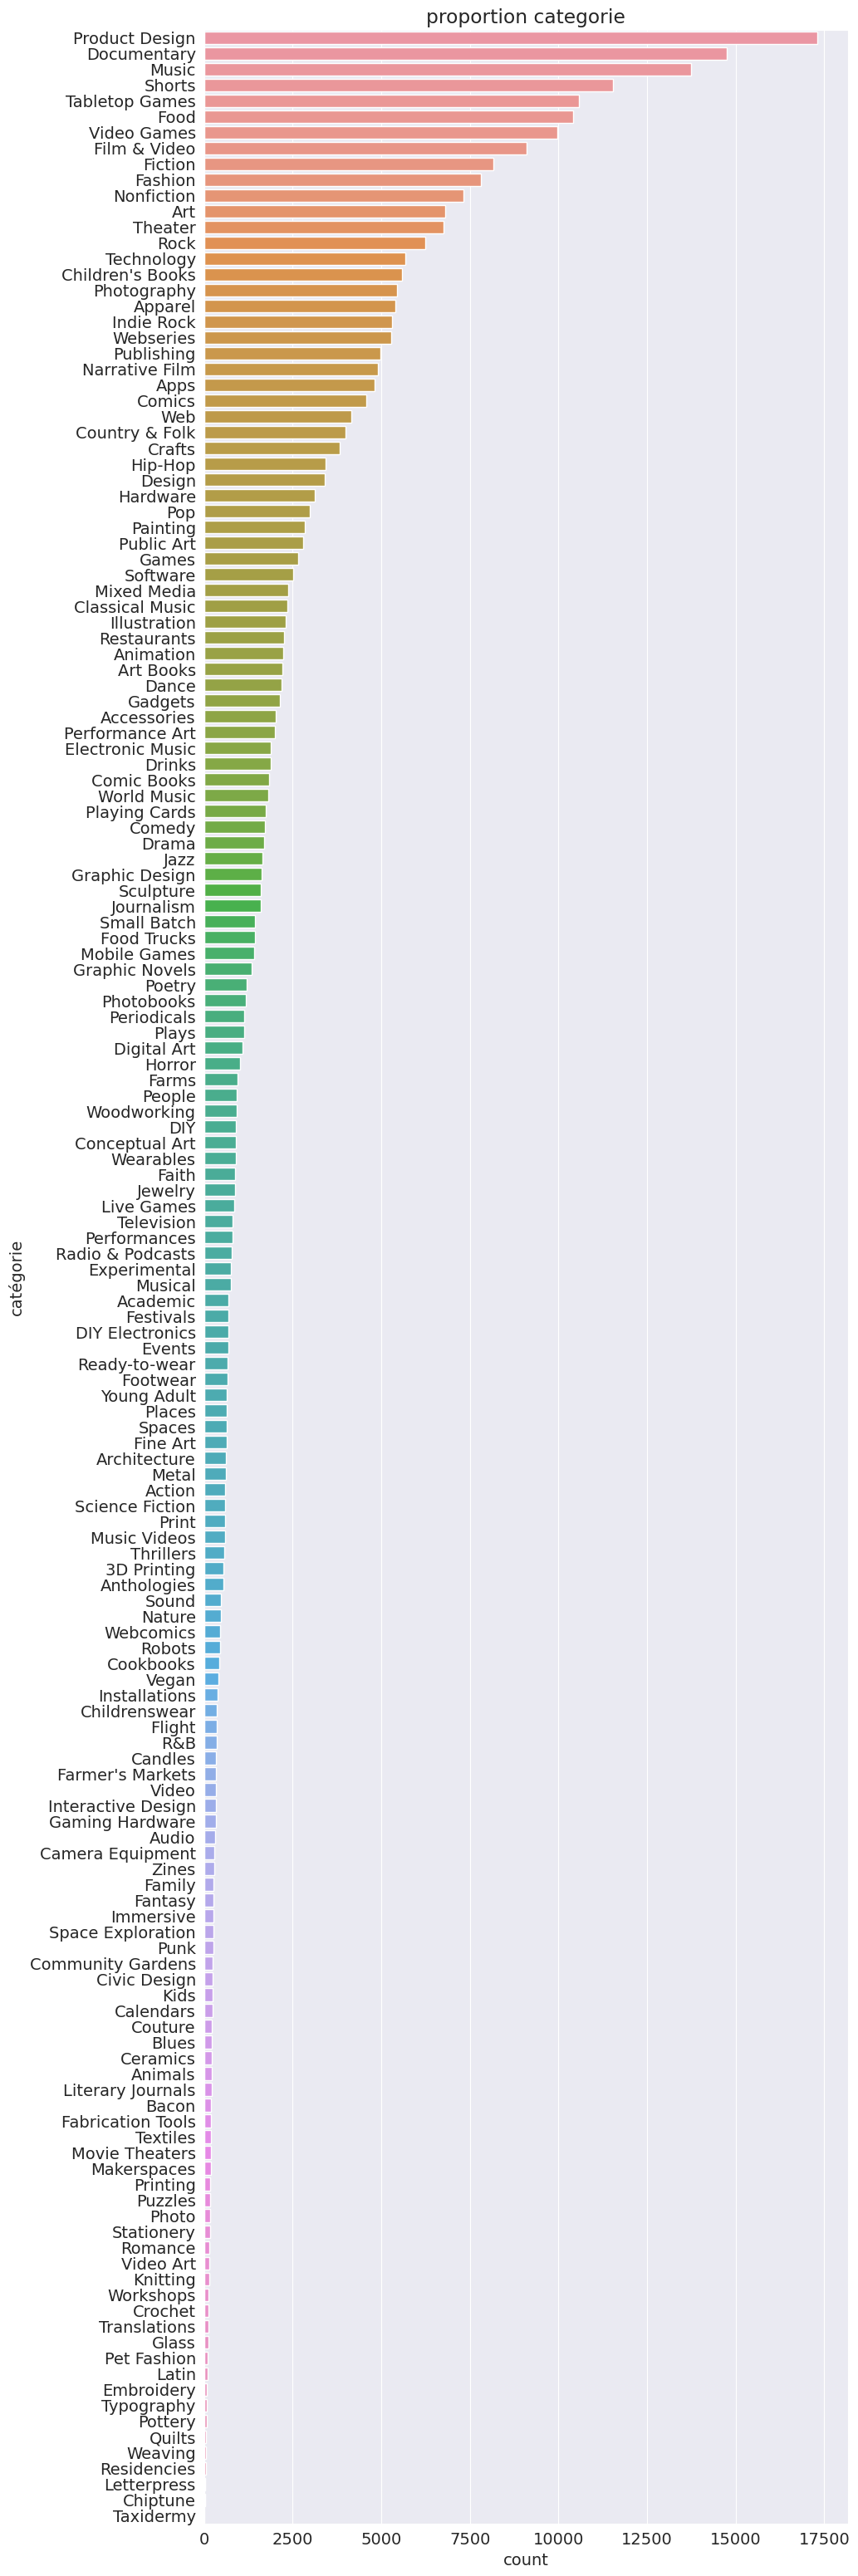

In [126]:
bar_plot(data.category, 'proportion categorie', 'catégorie')

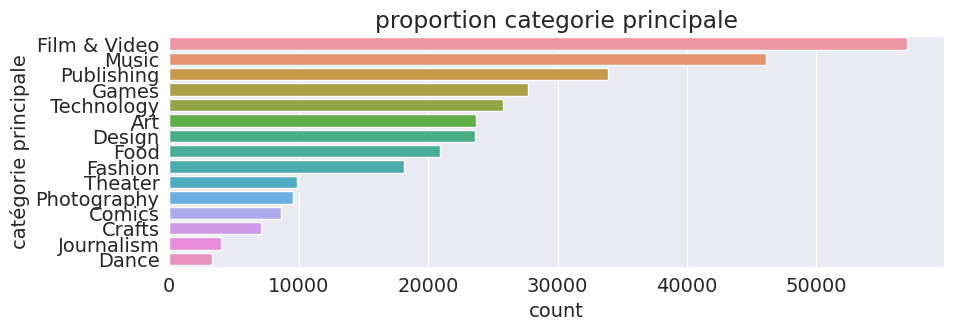

In [127]:
bar_plot(data.main_category, 'proportion categorie principale', 'catégorie principale')

**Qu'en est-il de celui des devises?**

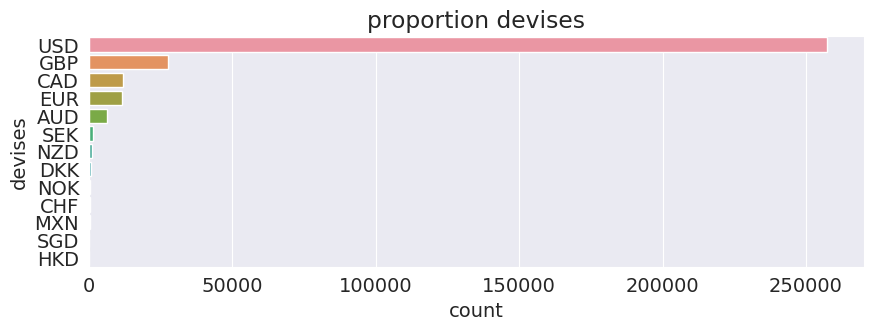

In [128]:
bar_plot(data.currency, 'proportion devises', 'devises')

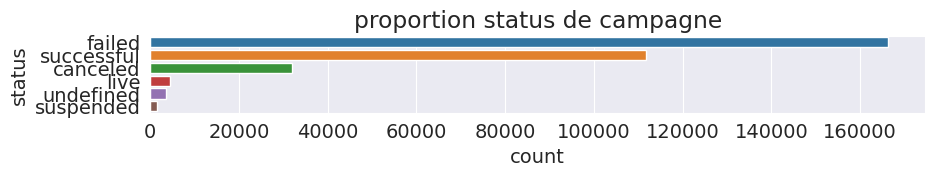

In [129]:
bar_plot(data.state, 'proportion status de campagne', 'status')

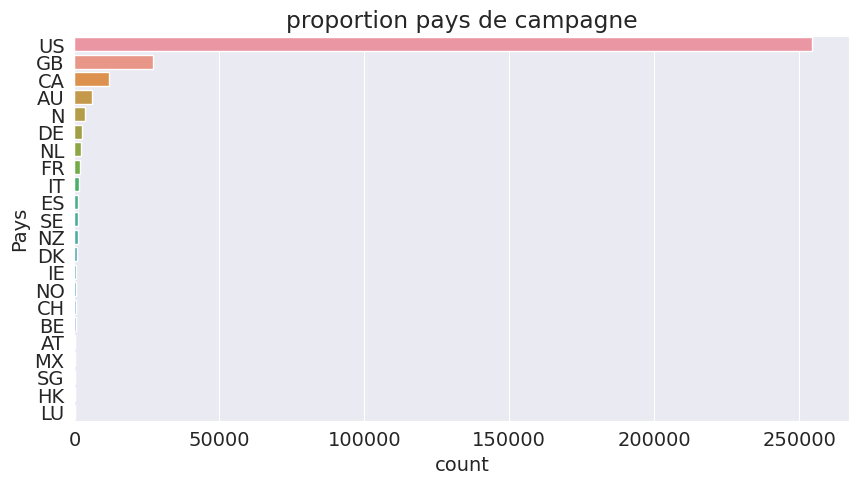

In [130]:
bar_plot(data.country, 'proportion pays de campagne', 'Pays')

In [141]:
def state_bar_plot(data, column, state, stacked=True):
    """Afficher le diagramme en bar permettant de visualiser la attribut d'une seule dimension filtré suivant une dimension
    Args :
      data : le dataframe
      column: la dimension à analyser
      state: la dimension de filtrage
      stacked: un flag indiquant si oui ou non, les valeurs de decompte suivant la dimension de filtrage doivent être empilé.

    Retourne :
      Aucun
    """
    # grouper les donner suivant le status de la campagne
    grouped_data = data.groupby(state)[column].value_counts()
    # construction du jeu de données pour le diagramme de bar empilé
    dim = {} # un dictionnaire de données de décompte des sources dans les cibles 
    uniq_col_val = np.unique(data[column]).tolist() # liste des valeurs unique de la dimension à analyse
    uniq_state_val = np.unique(data[state]).tolist() # liste des valeurs unique de la dimension sur laquel ce base l'analyse
    for status in uniq_state_val: # parcourir les valeurs de la dimension de base
        column_in_status = grouped_data[status].keys().tolist() # recuperer les valuers de la dimension d'analyse en relation avec celle de base
        dim[status] = [] # initialiser un vecteur d'occurence de cibles
        for cibles in uniq_col_val: # parcourir les valeurs unique de la dimension d'analyse
            if not(cibles in column_in_status):
                dim[status].append(0) # cette cible n'existe pas dans la base
            else:
                dim[status].append(grouped_data[status][cibles]) # le nombre d'occurence de la cible
    # creation du dataframe
    data_f = pd.DataFrame(dim,index=uniq_col_val)
    # dessiner le diagramme en barh resultant
    width = 10
    height = int(len(uniq_col_val)/4)
    
    data_f.plot.barh(stacked=stacked,figsize=(width,height))
    
                
        
        
        

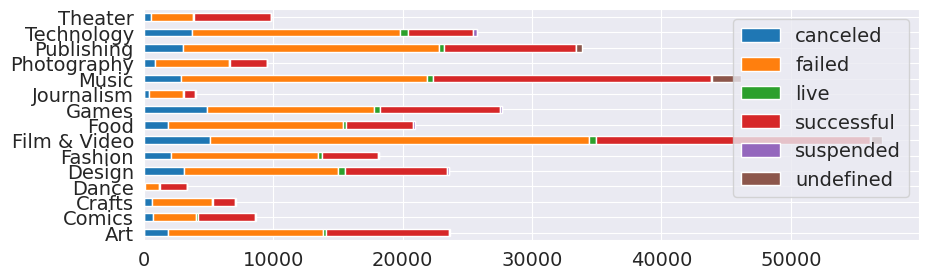

In [132]:
state_bar_plot(data,'main_category','state')

#### ``Insights 1``
**Ce graphique nous montre que les campagnes qui ont plus de succès sont celles de la catégorie principale ``music`` et aussi la catégorie principale ``Film & Video`` est beaucoup representé et connais un grand nombre de succès bien que ses failites sont aussi proportionnelles**

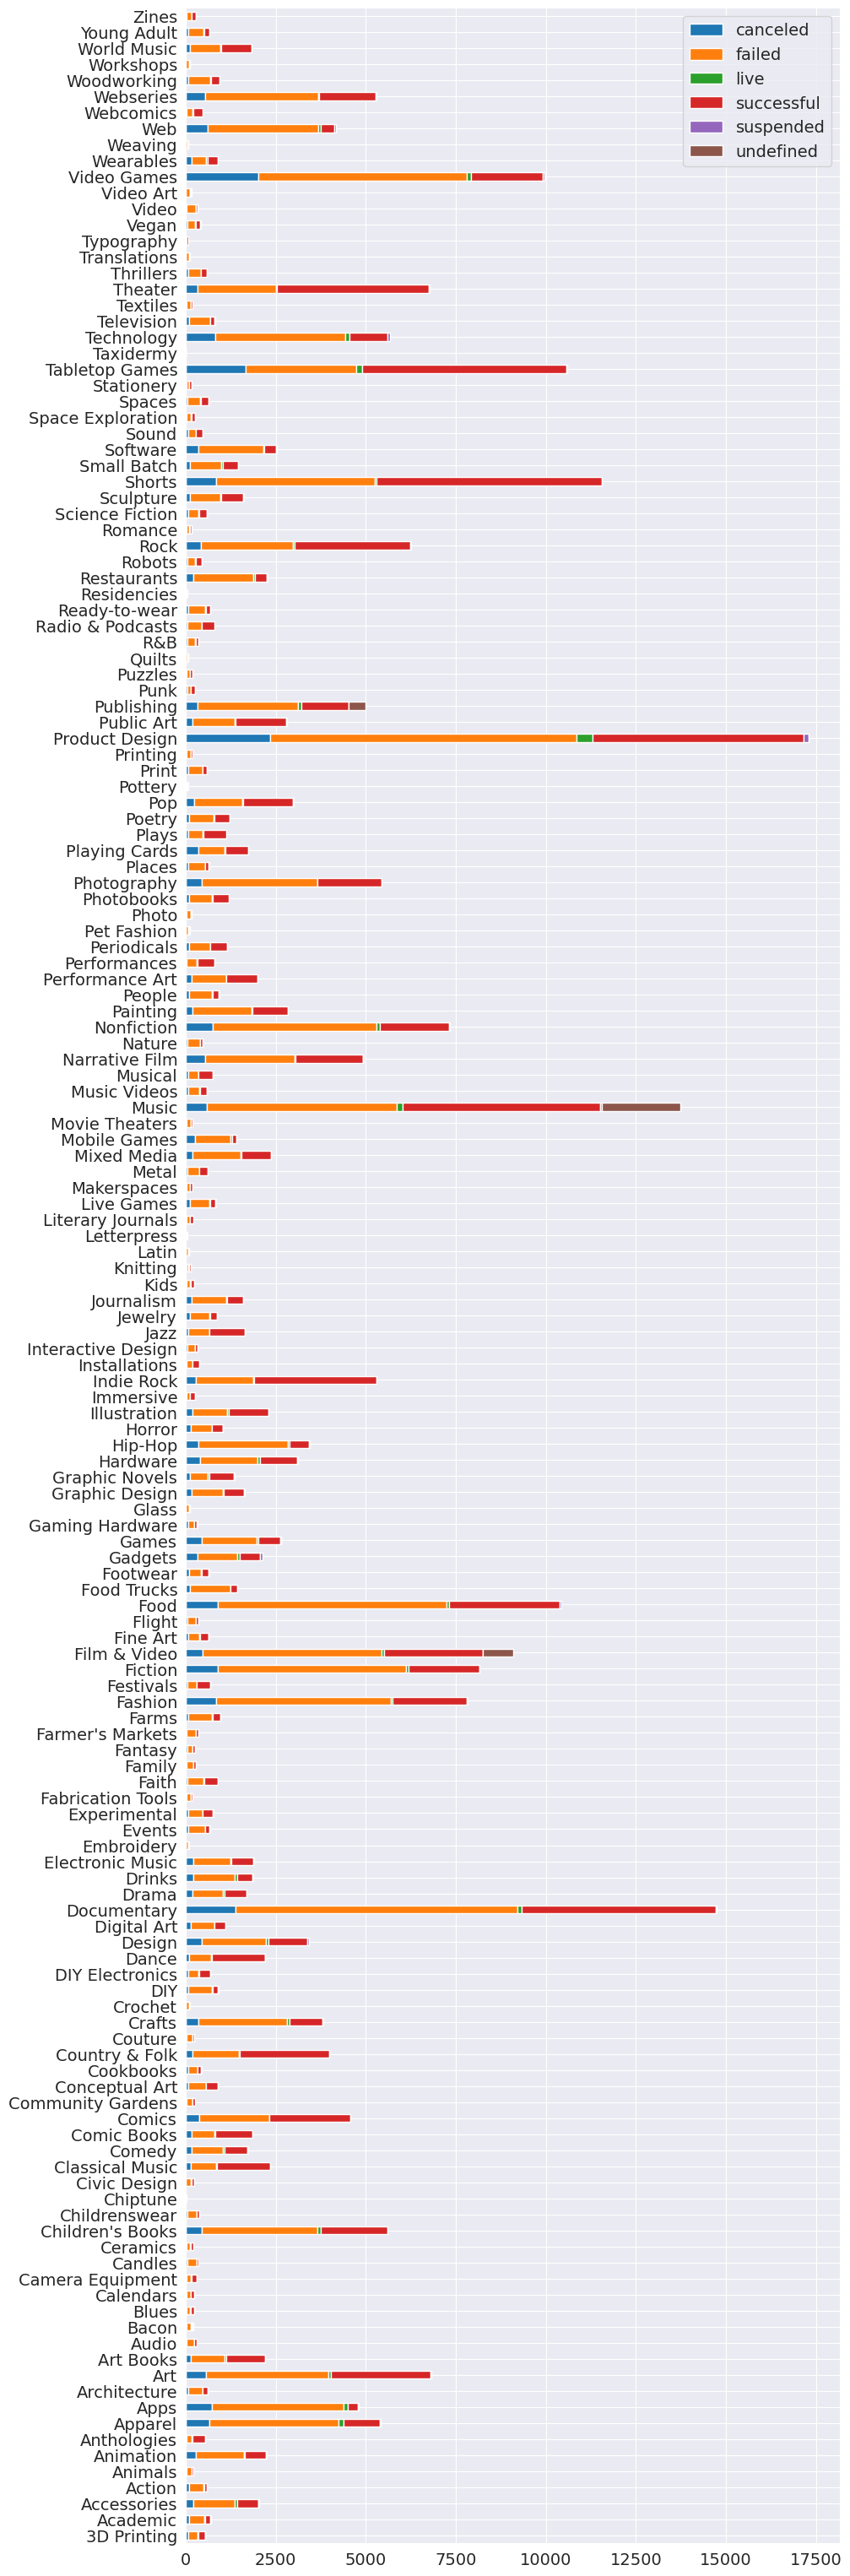

In [133]:
state_bar_plot(data,'category','state')

#### ``Insights 2``

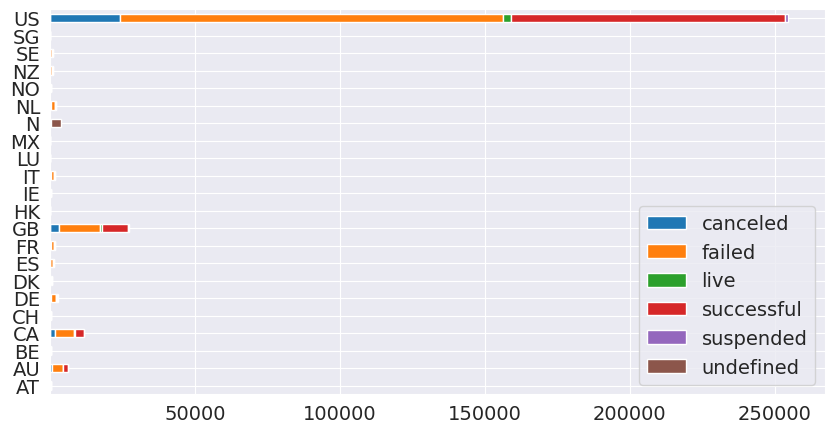

In [134]:
state_bar_plot(data,'country','state')

**La majeur partie des campagnes à succès sont passé en `` US``**

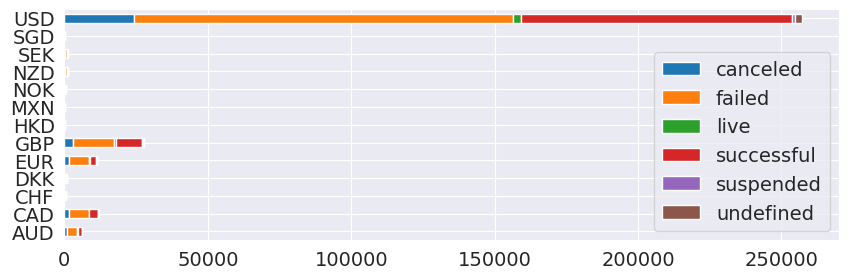

In [135]:
state_bar_plot(data,'currency','state')

## <div style="border-radius:0px; border:#2020ff solid; padding: 15px; background-color: #2020d1; font-size:100%; text-align:center; color: #FFFFFF">4. Ingenieurie des Caractéristiques</div>

In [181]:
data_ing = data.copy(deep=True)

**Les intuitions Ici sont les suivantes:**

- **Les chanps ``deadline`` et ``launched`` peuvent nous permettre d'extraire ``le mois``, ``l'année``, ``la durée`` de la campagne dans chacun d'eux.** 
- **Aussi,les champs ``goal``, ``pledged`` et ``durée`` recemment extrait ``le ratio montant enregistré sur objectif financier`` et ``le ratio motant enregistré fois durée sur objectif financier``**
- **La colonne ``name`` n'est pas porteuse d'information donc peut être supprimée**
- **Pour moi l'objectif étant de pouvoir predire si une campagne sur la base de d'informations sera à succès ou non, les dérivés de l'échec seront retransformées en échec**
- les champs ``pledged``, ``usd pledged``, ``backers`` n'existent qu'une fois la campagne passée. Donc ne nous apporte pas d'information utile pour la tache de prédiction de succès d'une idée naissante de campagne

In [182]:
# Suppression de la colonne name
data_ing.drop(['name','pledged','usd pledged','backers'], axis=1, inplace=True)
data.reset_index(drop=True, inplace=True)

In [183]:
# Binarisation de la variable State
data_ing.loc[data_ing.state != 'successful',['state']] = 'failed'
data_ing

,ID,category,main_category,currency,deadline,goal,launched,state,country
0,1000002330,Poetry,Publishing,GBP,2015-10-09 11:36:00,1000.0,2015-08-11 12:12:28,failed,GB
1,1000004038,Narrative Film,Film & Video,USD,2013-02-26 00:20:50,45000.0,2013-01-12 00:20:50,failed,US
2,1000007540,Music,Music,USD,2012-04-16 04:24:11,5000.0,2012-03-17 03:24:11,failed,US
3,1000011046,Film & Video,Film & Video,USD,2015-08-29 01:00:00,19500.0,2015-07-04 08:35:03,failed,US
4,1000014025,Restaurants,Food,USD,2016-04-01 13:38:27,50000.0,2016-02-26 13:38:27,successful,US
...,...,...,...,...,...,...,...,...,...
319451,974050786,Technology,Technology,USD,2015-09-19 21:29:22,500.0,2015-09-01 21:29:22,successful,US
319452,974060841,Illustration,Art,USD,2015-09-26 17:03:52,4000.0,2015-08-27 17:03:52,failed,US
319453,974061757,Cookbooks,Food,USD,2016-04-17 18:16:13,5000.0,2016-03-18 17:16:13,failed,US
319454,974069941,Pop,Music,USD,2012-08-31 06:00:00,3000.0,2012-07-30 18:06:25,failed,US


In [184]:
# Calculer les données d'horodatage

data_ing['duration'] = [abs(datetime.strptime(data_ing.deadline[i], '%Y-%m-%d %H:%M:%S').date() - datetime.strptime(data_ing.launched[i], '%Y-%m-%d %H:%M:%S').date()).days for i in data_ing.index.tolist()]
data_ing['launched_year'] =  [datetime.strptime(data_ing.launched[i], '%Y-%m-%d %H:%M:%S').date().year for i in data_ing.index.tolist()]
data_ing['deadline_year'] =  [datetime.strptime(data_ing.deadline[i], '%Y-%m-%d %H:%M:%S').date().year for i in data_ing.index.tolist()]
data_ing['launched_month'] =  [datetime.strptime(data_ing.launched[i], '%Y-%m-%d %H:%M:%S').date().month for i in data_ing.index.tolist()]
data_ing['deadline_month'] =  [datetime.strptime(data_ing.deadline[i], '%Y-%m-%d %H:%M:%S').date().month for i in data_ing.index.tolist()]


#### ``Insights 3``

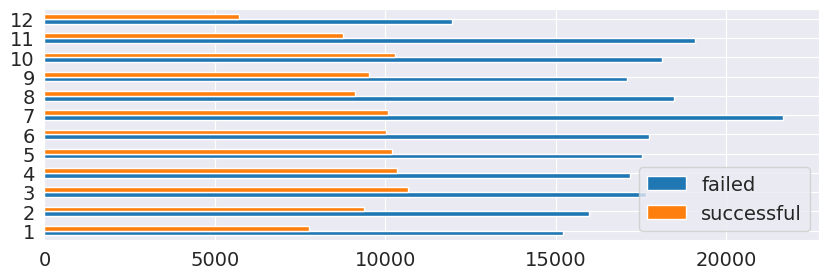

In [142]:
state_bar_plot(data_ing,'launched_month','state', stacked=False)

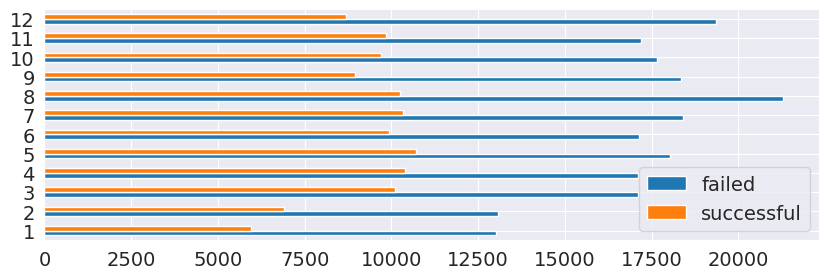

In [144]:
state_bar_plot(data_ing,'deadline_month','state', stacked=False)

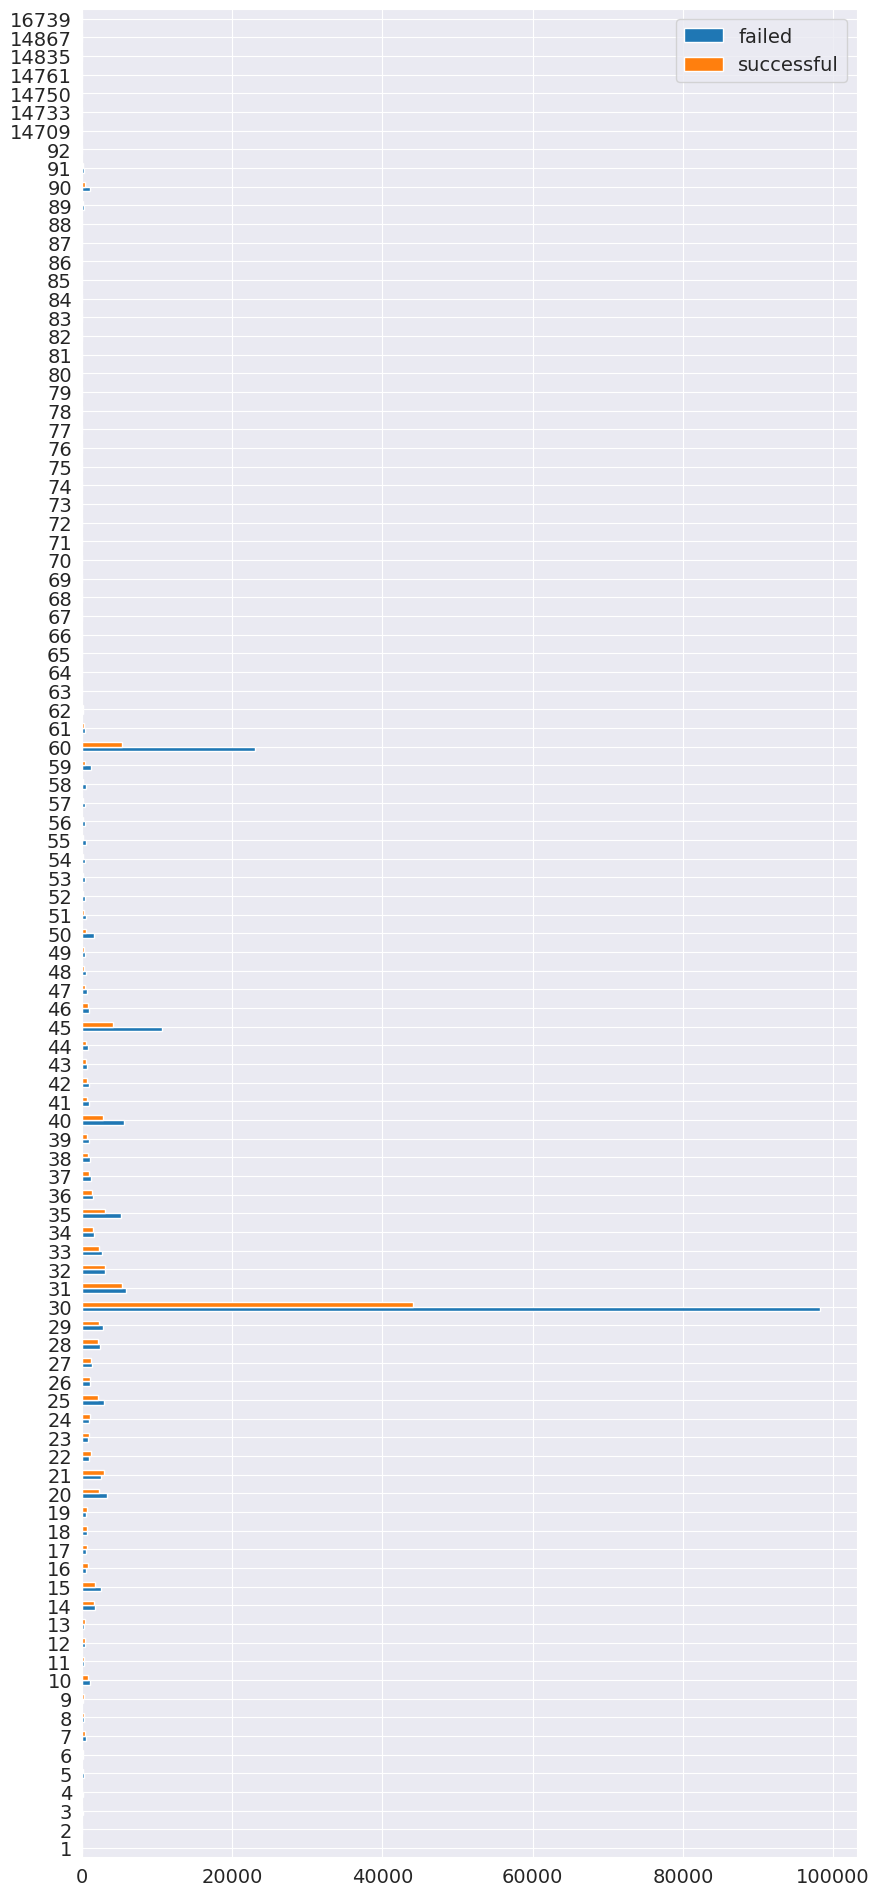

In [145]:
state_bar_plot(data_ing,'duration','state', stacked=False)

**Les campagnes éffectuées sur une durée ``d'un mois``et qui commence au mois de ``Fevrier`` sont les plus succeptibles de reussir**

In [185]:
# Calcul de ratio financier
#data_ing['ratio_goal_pledged'] = [data_ing.pledged[i] / data_ing.goal[i] for i in data_ing.index.tolist()]
#data_ing['ratio_goal_pledged_time_duration'] = [data_ing.pledged[i] / (data_ing.goal[i] * data_ing.duration[i]) for i in data_ing.index.tolist()]
data_ing['ratio_goal_duration'] = [data_ing.duration[i] / data_ing.goal[i] for i in data_ing.index.tolist()]



In [186]:
# Suppression des colonnes de date
data_ing.drop(['deadline','launched'], axis=1, inplace=True)

**Une autre remarque qui doit être fait que öes champs ``category`` et ``main_category`` possède des valeurs identique qui se veront être un souci pour notre phase de modélisation**

In [150]:
def unique_value_dimensions(dataframe):
    """isoler les valeurs d'une dimension par rapport aux autres pour les colonnes catégorielles
    Args :
      data : le dataframe

    Retourne :
      Aucun
    """
    # copie profonde
    data = dataframe.copy(deep=True)
    # récupérer les colonnes catégorielles
    cat = data.select_dtypes(include='object').columns.tolist()
    for i,col in enumerate(cat): # parcourir ses colonnes
        uniq_col_val = np.unique(data[col]).tolist() # liste des valeurs unique de la colonne
        for suivante in cat[(i+1):]:
            uniq_suivant_val = np.unique(data[suivante]).tolist() # liste des valeur de la colonne suivante
            intersection = list(set(uniq_col_val).intersection(set(uniq_suivant_val))) # trouver les valeurs communes
            if len(intersection) > 0: # s'il existe des valeurs communes
                for val in intersection: # parcourir les ligne à valeurs communes pour les différencier par le nom de la colonne
                    data.loc[data[col] == val,[col]] = val+'_'+col
                    data.loc[data[suivante] == val,[suivante]] = val+'_'+suivante
    return data

In [187]:
data_ing.info()

<class 'pandas.core.frame.DataFrame'>

RangeIndex: 319456 entries, 0 to 319455

Data columns (total 13 columns):

 #   Column               Non-Null Count   Dtype  

---  ------               --------------   -----  

 0   ID                   319456 non-null  int64  

 1   category             319456 non-null  object 

 2   main_category        319456 non-null  object 

 3   currency             319456 non-null  object 

 4   goal                 319456 non-null  float64

 5   state                319456 non-null  object 

 6   country              319456 non-null  object 

 7   duration             319456 non-null  int64  

 8   launched_year        319456 non-null  int64  

 9   deadline_year        319456 non-null  int64  

 10  launched_month       319456 non-null  int64  

 11  deadline_month       319456 non-null  int64  

 12  ratio_goal_duration  319456 non-null  float64

dtypes: float64(2), int64(6), object(5)

memory usage: 31.7+ MB


In [188]:
data_ing = unique_value_dimensions(data_ing)

In [156]:
data_ing.main_category.unique()

array(['Publishing_main_category', 'Film & Video_main_category',
       'Music_main_category', 'Food_main_category',
       'Design_main_category', 'Crafts_main_category',
       'Games_main_category', 'Comics_main_category',
       'Fashion_main_category', 'Theater_main_category',
       'Art_main_category', 'Photography_main_category',
       'Technology_main_category', 'Dance_main_category',
       'Journalism_main_category'], dtype=object)

In [157]:
data_ing.category.unique()

array(['Poetry', 'Narrative Film', 'Music_category',
       'Film & Video_category', 'Restaurants', 'Food_category', 'Drinks',
       'Product Design', 'Documentary', 'Nonfiction', 'Indie Rock',
       'Crafts_category', 'Games_category', 'Design_category',
       'Comic Books', 'Art Books', 'Fashion_category', 'Theater_category',
       'Comics_category', 'DIY', 'Webseries', 'Food Trucks', 'Public Art',
       'Illustration', 'Photography_category', 'Pop', 'Tabletop Games',
       'Art_category', 'Family', 'Fiction', 'Accessories', 'Rock',
       'Hardware', 'Weaving', 'Gadgets', 'Web', 'Jazz', 'Ready-to-wear',
       'Festivals', 'Video Games', 'Anthologies', 'Publishing_category',
       'Shorts', 'Electronic Music', 'Radio & Podcasts', 'Apps',
       'Cookbooks', 'Apparel', 'Metal', 'Hip-Hop', 'Periodicals',
       'Dance_category', 'Technology_category', 'Painting', 'Software',
       'World Music', 'Photobooks', 'Drama', 'Architecture',
       'Young Adult', 'Mobile Games', 'Flig

In [ ]:
#save_dataset(data, 'ks-dataset', sep=",")

## <div style="border-radius:0px; border:#2020ff solid; padding: 15px; background-color: #2020d1; font-size:100%; text-align:center; color: #FFFFFF">5. Modélisation des données</div>

In [189]:
data_ing.describe().style.set_properties(**{'background-color': '#2020d1','color': '#FFFFFF','border-color': '#FFFFFF'})

,ID,goal,duration,launched_year,deadline_year,launched_month,deadline_month,ratio_goal_duration
count,319456.000000,319456.000000,319456.000000,319456.000000,319456.000000,319456.000000,319456.000000,319456.000000
mean,1077316842.248557,46959.566458,34.766124,2013.788863,2013.856772,6.442872,6.771662,0.082855
std,622361072.990325,1139148.816112,71.571401,1.705538,1.683707,3.299392,3.315167,6.700599
min,5971.000000,0.010000,1.000000,1970.000000,2009.000000,1.000000,1.000000,0.000000
25%,533283607.250000,2000.000000,30.000000,2013.000000,2013.000000,4.000000,4.000000,0.002000
50%,1090445264.000000,5000.000000,30.000000,2014.000000,2014.000000,7.000000,7.000000,0.006000
75%,1618062463.000000,15000.000000,38.000000,2015.000000,2015.000000,9.000000,10.000000,0.015000
max,2147476221.000000,100000000.000000,16739.000000,2016.000000,2017.000000,12.000000,12.000000,3600.000000


In [190]:
data_ing.columns.tolist()

['ID',
 'category',
 'main_category',
 'currency',
 'goal',
 'state',
 'country',
 'duration',
 'launched_year',
 'deadline_year',
 'launched_month',
 'deadline_month',
 'ratio_goal_duration']

In [191]:
col_list = [
    'ID',
    'category',
    'main_category',
    'currency',
    'goal',
    'state',
    'country',
    'duration',
    'launched_year',
    'deadline_year',
    'launched_month',
    'deadline_month',
    'ratio_goal_duration'
]


ordinal_factor_colums = [
    'state',
]

nominal_factor_colums = [
    'category',
    'main_category',
    'currency',
    'country',
]

numeric_uniform_colums = [
    'duration',
    'launched_year',
    'deadline_year',
    'launched_month',
    'deadline_month',
    'ratio_goal_duration',
    'goal',
]

numeric_with_outliers_columns = [
]

check = ordinal_factor_colums.copy()
check.extend(nominal_factor_colums)
check.extend(numeric_uniform_colums)
check.extend(numeric_with_outliers_columns)
print("Good") if len(list(set(col_list)-set(check)) if len(check) <= len(col_list) else list(set(check)-set(col_list))) == 1 else print(f"Error")

Good


In [161]:
def numeric_standardization_with_outliers(data, variables_list):
    """Utiliser l'IQR pour normaliser une dimension avec des valeurs extrêmes
    Args :
      data : Un cadre de données contenant la dimension à normaliser
      variables_list : Liste des dimensions sur lesquelles appliquer la standardisation en tenant compte des valeurs aberrantes

    Retourne :
      Le nouveau dataframe avec toutes les dimensions standardisées.
    """
    
    dataframe = data.copy(deep=True)
    # 1) for each variable
    for var in variables_list:
        # a) compute Q1 and Q3
        Q1 = dataframe[var].quantile(0.25)
        Q3 = dataframe[var].quantile(0.75)
        # b) compute IQR
        IQR = Q3 - Q1
        # c) compute sup and inf
        sup = Q3 + (1.5 * IQR)
        inf = Q1 - (1.5 * IQR)
        for line in dataframe.index.values.tolist():
            # if less than inf
            if dataframe.loc[line, var] < inf:
                dataframe.loc[line, var] = inf/sup
            # else greater than sup
            elif dataframe.loc[line, var] > sup:
                dataframe.loc[line, var] = 1
            # else
            else:
                dataframe.loc[line, var] = dataframe.loc[line, var]/sup
    return dataframe


In [162]:
def numeric_uniform_standardization(data, variables_list):
    """Utiliser la division max pour standardiser la dimension
    Args :
      data : Un cadre de données contenant la dimension à normaliser
      variables_list : Liste des dimensions sur lesquelles la standardisation est appliquée

    Retourne :
      Le nouveau dataframe avec toutes les dimensions standardisées.
    """
    
    dataframe = data.copy(deep=True)
    # 1) for each variable
    for var in variables_list:
        # get maximum value
        maxi = dataframe[var].max()
        dataframe[var] = dataframe[var]/maxi
    return dataframe

In [163]:
def ordinal_factor_encoding(data, variables_list):
    """Appliquer LabelEncoding sur la dimension factorielle ordinale
    Args :
      data : Un cadre de données contenant la dimension à normaliser
      variables_list : Liste des dimensions sur lesquelles appliquer le codage

    Retourne :
      Le nouveau dataframe avec toutes les dimensions encodées.
    """
    
    dataframe = data.copy(deep=True)
    from sklearn.preprocessing import LabelEncoder
    # 1) for each variable
    for var in variables_list:
        label_encoder = LabelEncoder()
        dataframe[var] = label_encoder.fit_transform(dataframe[var])
    return dataframe


In [164]:
def nominal_factor_encoding(data, variables_list):
    """Appliquer One Hot Encoding (OHE) sur une dimension factorielle ordinale
    Args :
      data : Un cadre de données contenant la dimension à normaliser
      variables_list : Liste des dimensions sur lesquelles appliquer l'OHE

    Retourne :
      Le nouveau dataframe avec toutes les dimensions standardisées.
    """
    
    dataframe = data.copy(deep=True)
    ohe = OneHotEncoder()
    ohe.fit(dataframe[variables_list])
    merge_ohe_col = np.concatenate((ohe.categories_)) # list of all new dimension names
    ohe_data = pd.DataFrame(ohe.transform(dataframe[variables_list]).toarray(), columns=merge_ohe_col) # make the one hot encoding and save the result inside a temp source
    dataframe = pd.concat([ohe_data, dataframe], axis=1) #  concat existing and news columns dimensions
    dataframe = dataframe.drop(variables_list, axis=1) # remove all nominal unencoded dimensions
    return (dataframe, ohe.categories_)

In [192]:
# binariser les variables factorielles non quantifiable
data_ing.reset_index(drop=True, inplace=True)
DATA_OHE, OHE = nominal_factor_encoding(data_ing, nominal_factor_colums)

In [193]:
# quantifier la variables state pour n'avoir que des nombres
DATA_OHE_LB = ordinal_factor_encoding(DATA_OHE,ordinal_factor_colums)

In [194]:
# normaliser les variables numériques uniformes pour les ramener dans la fourchette 0,1
DATA_OHE_LB_LBU_STDU = numeric_uniform_standardization(DATA_OHE_LB,numeric_uniform_colums)

In [195]:
# normaliser les variables numériques avec valeurs extrême pour les ramener dans la fourchette 0,1
DATA_OHE_LB_LBU_STDU_STDWO = numeric_uniform_standardization(DATA_OHE_LB_LBU_STDU,numeric_with_outliers_columns)

In [196]:
DATA_OHE_LB_LBU_STDU_STDWO.head()

,3D Printing,Academic,Accessories,Action,Animals,Animation,Anthologies,Apparel,Apps,Architecture,...,US,ID,goal,state,duration,launched_year,deadline_year,launched_month,deadline_month,ratio_goal_duration
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1000002330,0.000010,0,0.003525,0.999504,0.999008,0.666667,0.833333,1.638889e-05
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1000004038,0.000450,0,0.002688,0.998512,0.998017,0.083333,0.166667,2.777778e-07
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1000007540,0.000050,0,0.001792,0.998016,0.997521,0.250000,0.333333,1.666667e-06
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1000011046,0.000195,0,0.003345,0.999504,0.999008,0.583333,0.666667,7.977208e-07
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1000014025,0.000500,1,0.002091,1.000000,0.999504,0.166667,0.333333,1.944444e-07


In [197]:
#save_dataset(DATA_OHE_LB_LBU_STDU_STDWO, 'ks-dataset-modeled', sep=",")

## <div style="border-radius:0px; border:#2020ff solid; padding: 15px; background-color: #2020d1; font-size:100%; text-align:center; color: #FFFFFF">6. Construction des modèles d'apprentissage automatique</div>

In [198]:
X = DATA_OHE_LB_LBU_STDU_STDWO.drop(['ID'],axis=1)

In [199]:
X.state.value_counts()

state
0    207698
1    111758
Name: count, dtype: int64

**Nous remarquons que le jeu de données est déséquilibré en faveur des failites**

In [200]:
x = X.drop(['state'], axis=1)
y = X.state

In [201]:
# augmentation aleatoire de la classe minoritaire
#oversampler = SMOTE(sampling_strategy=0.75, random_state=42)
oversampler = SMOTE(random_state=42)
# Data for oversampling
X_r, y_r = oversampler.fit_resample(x, y)

In [202]:
DATA_OVER = X_r
DATA_OVER['state'] = y_r

In [177]:
#DATA_OVER = read_dataset('/kaggle/working/CANAM_2023_ks-dataset-smothed_2023_11_16_15_38_24.csv', sep=',')
#X_r = DATA_OVER.drop(['state'],axis=1)
#y_r = DATA_OVER.state

In [203]:
DATA_OVER.state.value_counts()

state
0    207698
1    207698
Name: count, dtype: int64

In [205]:
#save_dataset(DATA_OVER, 'ks-dataset-smothed', sep=",")

In [206]:
print_dimension(DATA_OVER.shape)



    Ce jeu de données contient exactement :

    415396 lignes et 

    216 colonnes

    


In [15]:
svc = SVC(probability=True) # car plus la dimension est grande, plus SVC prend du temps pour l'entrainement
knc = KNeighborsClassifier() #algorithm='ball_tree', leaf_size=10, n_neighbors=18, p=1, weights='distance'
mnb = MultinomialNB()
dtc = DecisionTreeClassifier()
lrc = LogisticRegression()
rfc = RandomForestClassifier()
abc = AdaBoostClassifier()
bc = BaggingClassifier()
etc = ExtraTreesClassifier()
gbdt = GradientBoostingClassifier()
xgb = XGBClassifier()
cat = CatBoostClassifier(verbose=0) 
lgb = lgb.LGBMClassifier() 

In [16]:
clfs = {
    'xgb':xgb,
    'dtc':dtc,
    'lrc':lrc,
    'rfc':rfc,
    'knn':knc,
    'cat':cat,
    'lgb':lgb,
    'mnb': mnb,
    'abc': abc,
    'bc': bc,
    'etc':etc,
    'gbdt':gbdt,
    'sv' :svc

}

In [9]:
def init_training_store():
    """Initialisation du cadre de données pour le stockage des informations sur l'entrainement
    Args :
        Aucun 
        

    Retourne :
        Nouveau cadre de données avec seulement des colonnes
    """
    
    cols = [
        'precision',
        'accuracy',
        'recall',
        'f1-score'
    ]
    return pd.DataFrame(columns=cols)

In [10]:
def train_classifier(name, clf,X_train,y_train,X_test,y_test, store):
    """Entraîne un classificateur sur un jeu de données
    Args :
        name : nom du classificateur
        clf : instance du classificateur
        X_train : données d'entraînement
        y_train : classe d'entraînement
        X_test : données de test
        y_test : classe de test
        store : cadre de données de stockage
        

    Retourne :
       le stockage d'apprentissage
    """
    
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    recall = recall_score(y_test,y_pred, average='macro')
    f1_score_r = f1_score(y_test,y_pred, average='macro')
    
    save_model(clf, name)
    vals = [precision,accuracy,recall,f1_score_r]
    store.loc[name] = vals
    
    return store, y_pred

In [11]:
def train(clfs,x_train,y_train,x_test,y_test, store):
    """Entraîner nos classificateurs de base
    Args :
        clfs : dict d'instances de classificateurs
        X_train : données d'entraînement
        y_train : classe d'entraînement
        X_test : données de test
        y_test : classe de test
        store : cadre de données de stockage
        

    Retourne :
       Le stockage d'apprentissage
    """
    preds = {}
    for name,clf in clfs.items():
        
        store, y_pred = train_classifier(name, clf, x_train,y_train,x_test,y_test, store)
        preds[name] = y_pred
    # save of model training logs    
    save_dataset(store, 'all_model_scores')
    save_dataset(pd.DataFrame(preds), 'predicted')
    
    return store

In [12]:
def test_train(dataframe, target, test_size=0.2, random_state=12):
    """Diviser les étiquettes des données d'entraînement et de test
    Args :
        dataframe : dataframe
        target : variables de teinte
        test_size : taille des données de test,
        random_state : façon de randomiser l'exemple choisi
        

    Retourne :
        x_train, x_test, y_train, y_test
    """
    
    X = dataframe.drop([target], axis=1)
    Y = dataframe[target]

    x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size=test_size,random_state=random_state)
    #save_dataset(x_train, 'x_train')
    x_train.reset_index(inplace = True)
    x_test.reset_index(inplace = True)

    x_train = x_train.drop(['index'], axis=1)
    x_train.reset_index(inplace = True)
    x_train = x_train.drop(['index'], axis=1)

    x_test = x_test.drop(['index'], axis=1)
    x_test.reset_index(inplace = True)
    x_test = x_test.drop(['index'], axis=1)

    return x_train, x_test, y_train, y_test

In [13]:
STORE_STD = init_training_store()

In [14]:
#DATA_OVER = read_dataset('/kaggle/working/CANAM_2023_ks-dataset-smothed_2023_11_17_00_02_41.csv', sep=',')
x_train_c, x_test_c, y_train_c, y_test_c = test_train(DATA_OVER,'state')

In [216]:
#save_dataset(x_train_c, 'x_train_c', sep=",")
#save_dataset(x_test_c, 'x_test_c', sep=",")
#save_dataset(y_train_c, 'y_train_c', sep=",")
#save_dataset(y_test_c, 'y_test_c', sep=",")

In [ ]:
scores = train(
    clfs,
    x_train_c,
    y_train_c,
    x_test_c,
    y_test_c,
    STORE_STD
)

In [234]:
#scores = read_dataset('/kaggle/working/CANAM_2023_score_2023_11_17_00_25_10.csv', sep=',')
scores.head(20).style.set_properties(**{'background-color': '#2020d1','color': '#FFFFFF','border-color': '#FFFFFF'})

,precision,accuracy,recall,f1-score
xgb,0.754494,0.749157,0.749164,0.749135
dtc,0.704780,0.698724,0.698734,0.698668
lrc,0.629280,0.629357,0.629356,0.629356
rfc,0.746079,0.744788,0.744790,0.744788
knn,0.666869,0.678226,0.678202,0.677823
cat,0.781532,0.763662,0.763683,0.763437
lgb,0.759226,0.751276,0.751286,0.751225
mnb,0.617424,0.624844,0.624821,0.624425
abc,0.668510,0.677889,0.677869,0.677615
bc,0.749169,0.730525,0.730550,0.730167


In [219]:
save_dataset(scores, 'score', sep=",")

In [224]:
ensemble = VotingClassifier(estimators=[
    #('xgb',xgb), 
    ('lgb',lgb), 
    #('bc', bc),  
    ('cat', cat), 
    #('gbdt',gbdt), 
    #('rfc', rfc)
], voting='soft',verbose=0)

In [225]:
scores = train(
    {'ensemblei1':ensemble},
    x_train_c,
    y_train_c,
    x_test_c,
    y_test_c,
    scores
)

In [226]:
save_dataset(scores, 'score_1', sep=",")

In [227]:
scores.head(20).style.set_properties(**{'background-color': '#2020d1','color': '#FFFFFF','border-color': '#FFFFFF'})

,precision,accuracy,recall,f1-score
xgb,0.754494,0.749157,0.749164,0.749135
dtc,0.705267,0.699579,0.699588,0.699530
lrc,0.629280,0.629357,0.629356,0.629356
rfc,0.745097,0.743958,0.743959,0.743957
knn,0.666869,0.678226,0.678202,0.677823
cat,0.781532,0.763662,0.763683,0.763437
lgb,0.759226,0.751276,0.751286,0.751225
mnb,0.617424,0.624844,0.624821,0.624425
abc,0.668510,0.677889,0.677869,0.677615
bc,0.746586,0.727468,0.727493,0.727079


**Au vu de la supperiorité du CatBoostClassifier, nous allons optimizer ce modèle.**

## <div style="border-radius:0px; border:#2020ff solid; padding: 15px; background-color: #2020d1; font-size:100%; text-align:center; color: #FFFFFF">7. Reponses aux Questions du concours</div>

<div style="background-color: #FFFFFF; padding: 15px; border-radius: 10px; margin-top: 20px; text-align: left;; color: #2026d1">
    <ol>
        <li><b>Question 1 : Préparation des données</b> 
            <ol>
                <li><b>Problème de qualité de la données</b>
                    <ol>
                        <li><b>L'encodage du fichier du jeu de données</b> à été le premier défi, pour resoudre ce dernier il a fallu se servir de module <b>chardet</b> pour identifier l'encodage du fichier afin de mieux le charger.</li>
                        <li><b>Les espaces dans les noms de colonnes</b> qui rend la taches d'indexage plutôt difficile. la methode <b>strip</b> combinée au service <b>rename</b> de pandas ont permis de resoudre ce problème</li>
                        <li>Les erreurs lors de l'enregistrement des valeurs de la colonnes <b>name</b> via la séparation par la virgule <b>","</b> qui est le séparateur utlisé pour délimiter les dimensions. Pour resoudre ce problème il a fallu: 
                            <ul>
                                <li><b>Reaffecter les valeurs des dimensions dans les variables appropriées allant de la variable usd pledged vers name</b></li>
                                <li><b>concaténer des valeurs de dimension</b> pour le cas de la variables name pour exemples</li>
                                <li><b>suprrimer les lignes </b>pour supprimer la dernière ligne du jeu de données qui contenait plein de valeur abérrantes et les lignes où la variables name n'avait pas de valeurs (9 lignes) </li>
                            </ul>
                        </li>
                    </ol>
                </li>
                <li><b>Des tableaux de valeurs uniques par dimension</b> a été le visuel qu permettait de constater que tels que les données étaient mal formés, elles ne pouvaient servir à la construction d'un bon modèle pour resoudre ce problème.</li> 
            </ol>
        </li>
        <li><b>Question 2 : Insights et Caractéristiques</b> 
            <ol>
                <li><b>Trois (03) Insights pertinents</b> liés au succés de campagnes
                    <ol>
                        <li><b>Les campagnes éffectuées sur une durée <b>d'un mois</b> et qui commence au mois de <b>Fevrier</b> sont les plus succeptibles de reussir</b></li>
                        <li>La majeur partie des campagnes à succès sont passé en <b>US</b>
</li>
                        <li>les campagnes qui ont plus de succès sont celles de la catégorie principale <b>music</b> et aussi la catégorie principale <b>Film & Video</b> 
                        </li>
                    </ol>
                </li>
                <li>Naivement, nous aurons tendance à juger du succès d'une campagne sur la base de son <b>goal</b> financier, ou encore son équivalent <b>usd pledged</b> mais informations sont contraint par des facteurs latents tel que, <b>le nombre de personnes pouvant adhérer, le temps que mettra la campagne mieux la periode</b>. Alors pour prendre en compte ses variants, nous avons évalué des ratios qui pourraient eux offrir plus de connaissance à nos modèles contruites</li>
                <li>Les insights sont extraites des colonnes pour créer de nouvelles dimensions bien précises telles <b>duration,launched_year,deadline_year,launched_month,deadline_month,ratio_goal_pledged,ratio_goal_pledged_time_duration,ratio_goal__duration</b></li>
            </ol>
        </li>
        <li><b>Question 3 : Modèle ML et Impact Commercial</b> 
            <ol>
                <li><b>Explication des types de modèles, les hyperparamètres, et la validation croisée que tu utiliserais</b> liés au succés de campagnes
                    <ol>
                        <li>déjà ayant resolution le déséquilibe présent dans le jeu de données au moyen du module <b>SMOTE</b>, j'ai pu opter par la suite un processus de <b>validation croisée k-Fold (1-Folk particulièrement dans ce cas)</b> qui est plus adapté au données équilibré comparé à la <b>validation croisée Stratifié</b> qui est plus propre au context de données déséquilibré</li>
                        <li>Suite à ce fois, nous nous sommes permis d'étudier distinct modèles sur le jeu de données afin d'extraire un sous ensembles des meilleurs pour créer un <b>classifieur ensembliste</b>
                            <ul>
                                <li> <b>KNeighborsClassifier</b>
                                    <ul>
                                        <li>Type de modèle : K plus proches voisins (K-Nearest Neighbors)</li>
                                        <li>Hyperparamètres : n_neighbors (nombre de voisins à considérer) par défaut 5, weights (poids des voisins) par défaut 'uniform', metric (métrique de distance) par défaut 'auto'</li>
                                        <li></li>
                                    </ul>
                                </li>
                                <li> <b>MultinomialNB</b>
                                    <ul>
                                        <li>Type de modèle : Naive Bayes multinomial</li>
                                        <li>Hyperparamètres : alpha (paramètre de lissage) 1.0 par défaut, fit_prior (booléen pour spécifier si les probabilités a priori doivent être apprises à partir des données) True par défaut</li>
                                        <li></li>
                                    </ul>
                                </li>
                                <li> <b>DecisionTreeClassifier</b>
                                    <ul>
                                        <li>Type de modèle : Arbre de décision</li>
                                        <li>Hyperparamètres : criterion (critère pour mesurer la qualité de la division) 'gini' par défaut, max_depth (profondeur maximale de l'arbre) None par défaut, min_samples_split (nombre minimum d'échantillons requis pour effectuer une division) 2 par défaut</li>
                                        <li></li>
                                    </ul>
                                </li>
                                <li> <b>LogisticRegression</b>
                                    <ul>
                                        <li>Type de modèle : Régression logistique</li>
                                        <li>Hyperparamètres : C (inverse de la force de régularisation) 1.0 par défaut, penalty (type de régularisation) 'l2' par défaut</li>
                                        <li></li>
                                    </ul>
                                </li>
                                <li> <b>RandomForestClassifier</b>
                                    <ul>
                                        <li>Type de modèle : Forêt aléatoire</li>
                                        <li>Hyperparamètres : n_estimators (nombre d'arbres dans la forêt) 100 par défaut, max_depth (profondeur maximale des arbres de décision) None par défaut, min_samples_split (nombre minimum d'échantillons requis pour effectuer une division) 2 par défaut</li>
                                        <li></li>
                                    </ul>
                                </li>
                                <li> <b>AdaBoostClassifier</b>
                                    <ul>
                                        <li>Type de modèle : AdaBoost (Adaptive Boosting)</li>
                                        <li>Hyperparamètres : n_estimators (nombre d'estimateurs) 50 par défaut, learning_rate (taux d'apprentissage) 1.0 par défaut</li>
                                        <li></li>
                                    </ul>
                                </li>
                                <li> <b>BaggingClassifier</b>
                                    <ul>
                                        <li>Type de modèle : Bagging (Bootstrap Aggregating)</li>
                                        <li>Hyperparamètres : base_estimator (estimateur de base) DecisionTreeClassifier par défaut, n_estimators (nombre d'estimateurs) 10 par défaut</li>
                                        <li></li>
                                    </ul>
                                </li>
                                <li> <b>ExtraTreesClassifier</b>
                                    <ul>
                                        <li>Type de modèle : Extra Trees (Extremely Randomized Trees)</li>
                                        <li>Hyperparamètres : n_estimators (nombre d'estimateurs) 100 par défaut, max_depth (profondeur maximale des arbres de décision) None par défaut, min_samples_split (nombre minimum d'échantillons requis pour effectuer une division) 2 par défaut</li>
                                        <li></li>
                                    </ul>
                                </li>
                                <li> <b>GradientBoostingClassifier</b>
                                    <ul>
                                        <li>Type de modèle : Gradient Boosting</li>
                                        <li>Hyperparamètres : n_estimators (nombre d'estimateurs) 100 par défaut, learning_rate (taux d'apprentissage) 0.1 par défaut, max_depth (profondeur maximale des arbres de décision) 3 par défaut</li>
                                        <li></li>
                                    </ul>
                                </li>
                                <li> <b>XGBClassifier</b>
                                    <ul>
                                        <li>Type de modèle : XGBoost (Extreme Gradient Boosting)</li>
                                        <li>Hyperparamètres : n_estimators (nombre d'estimateurs) 100 par défaut, learning_rate (taux d'apprentissage)  0.1 par défaut, max_depth (profondeur maximale des arbres de décision) 3 par défaut</li>
                                        <li></li>
                                    </ul>
                                </li>
                                <li> <b>CatBoostClassifier</b>
                                    <ul>
                                        <li>Type de modèle : CatBoost</li>
                                        <li>Hyperparamètres : learning_rate (taux d'apprentissage) 0.03 par défaut, depth (profondeur de l'arbre) 6 par défaut, iterations (nombre d'itérations) 1000 par défaut</li>
                                        <li></li>
                                    </ul>
                                </li>
                                <li> <b>lgb.LGBMClassifier</b>
                                    <ul>
                                        <li>Type de modèle : LightGBM</li>
                                        <li>Hyperparamètres : learning_rate (taux d'apprentissage) par défaut 0.1, max_depth (profondeur maximale des arbres de décision) par défaut -1, num_leaves (nombre de feuilles des arbres) par défaut 31</li>
                                        <li></li>
                                    </ul>
                                </li>
                            </ul>
</li>
                        <li>les campagnes qui ont plus de succès sont celles de la catégorie principale <b>music</b> et aussi la catégorie principale <b>Film & Video</b> 
                        </li>
                    </ol>
                </li>
                <li>Les résultats produits par la solution ML est très précise dans le sense de la sensibilité des information nécessaires, et la qualité des décisions à engager. La solution Se contente de pouvoir prédire (classification binaire succès, echec) si une campagne sur la base d'information de génèse telles que <b>goal, duration, launch_month, launch_year, deadline_month, deadline_year, category and main_category, ratio_goal_duration, country</b> pour inférer si oui ou pas, il s'agit d'une campagne qui réussira. En soit, les promoteurs pourait tout s'implement consommer ce modèle comme une API dès lors qu'une nouvelle soumission de campagne arrive, une première prévision sera porté sur le succès de la dite campagne.</li>
                <li>Dans un système commercial, un tel modèle peut être utilisé à de nombreuses fins.
                    <ul>
                        <li>Désireux de créer un projet de construction d'une sale de cinématographie dans la ville de Yaoundé à realité Mixte, je ne possède pas les fonds suffisant pour et donc une campagne pour surlever les fonds nécessaire serait la bien mais pourrait aboutir à un échec. Donc je pourrait faire appel à cette solution pour trouver la configuration de variables qui pourrais me permettre de battre une campagne qui me profitera </li>
                        <li>projet de construction de site touristique dans la ville de Bana dans l'Ouest du fait de son paysage atrayant, quant? pour quel durée? quel fond? nécessaire pour ce projet. Le modèle nous permettra de tester de nombreuses combinaison de valeur afin de trouver ceux qui conviennent le mieux</li>
                    </ul>
                </li>
            </ol>
        </li>
        <li><b>Le temps</b> évoluant, les besoins s'en suivent et le context évolu parallèlement. Dans ce context, il sera plus judicieux de déjà penser une solution ML basé sur <b>l'apprentissage en Ligne ou Online Learning</b> qui aura l'avantage de recevoir dans le temps de nouveaux exemples qui pourraient potentiellèment introduire de nouvelles connaisant spatio-temporelles à la solution.</li>
        <li><b>NB: Le choix d'utiliser des modèles de machine learning traditionnel</b> est encouragé par le <b>besoin d'interpretabilité</b> qui un est un point critique en apprentissage automatique. En effet, chacun des modèles entrainé peut fournir <b>le coefficient d'importance de chaque caractéristique dans la prediction du succès de ce problème</b>. Ce qui peut donner de la connaissance aux experts sur les critiques qui sont pertinents pour la prise de décision.</li>
    </ol>
</div>


* [detection d'encodage ici 👆🏾](#encodage)

* [suppresion d'espace dans les noms de colonnes ici 👆🏾](#suppression-d'espaces-dans-les-noms-de-colonnes)

* [reorganisation des données et suppression des valeurs manquantes 👆🏾](#usd-pledged)

* [graphique illustrant l'impact de la qualité des données 👆🏾](#graphique-illustrant-l'impact-de-la-qualité-des-données)

* [Insight numéro 1 👆🏾](#Insights-1)

* [Insight numéro 2 👆🏾](#Insights-2)

* [Insight numéro 3 👆🏾](#Insights-3)

* [Ma solution ML 👆🏾](#6.-Construction-des-modèles-d'apprentissage-automatique)